In [ ]:
# Basic libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler

# Model selection and evaluation
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
warnings.filterwarnings('ignore')
#Ensuring data was imported and displayed correctly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
source_df = pd.read_csv('Datathon #3 Dataset - HAD7001.csv')

In [4]:
source_df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

In [5]:
cardio_patients_full = source_df[source_df['apache_3j_bodysystem'] == 'Cardiovascular']

In [6]:
targeted_columns = [
    'age',
    'gender',
    'weight',
    'pre_icu_los_days',
    'readmission_status',
    'ventilated_apache',
    'd1_heartrate_max',
    'd1_resprate_min',
    'd1_sysbp_max',
    'd1_hemaglobin_max',
    'd1_sodium_max',
    'd1_creatinine_max',
    'hepatic_failure',
    'diabetes_mellitus',
    'leukemia',
    'lymphoma',
    'solid_tumor_with_metastasis',
    'temp_apache',
    'd1_bun_max',
    'd1_glucose_max',
    'd1_wbc_max',
    'd1_hco3_max',
    'hospital_death'
    ]

categorical_columns = [
    'gender',
    'readmission_status',
    'ventilated_apache',
    'hepatic_failure',
    'diabetes_mellitus',
    'leukemia',
    'lymphoma',
    'solid_tumor_with_metastasis',
    'hospital_death' # the target y-label
]

numerical_columns = [
    'age',
    'weight',
    'pre_icu_los_days',
    'd1_heartrate_max',
    'd1_resprate_min',
    'd1_sysbp_max',
    'd1_hemaglobin_max',
    'd1_sodium_max',
    'd1_creatinine_max',
    'temp_apache',
    'd1_bun_max',
    'd1_glucose_max',
    'd1_wbc_max',
    'd1_hco3_max'
]

In [7]:
cardio_patients = cardio_patients_full[targeted_columns]
cardio_patients.head()

,age,gender,weight,pre_icu_los_days,readmission_status,ventilated_apache,d1_heartrate_max,d1_resprate_min,d1_sysbp_max,d1_hemaglobin_max,d1_sodium_max,d1_creatinine_max,hepatic_failure,diabetes_mellitus,leukemia,lymphoma,solid_tumor_with_metastasis,temp_apache,d1_bun_max,d1_glucose_max,d1_wbc_max,d1_hco3_max,hospital_death
3,81.0,F,61.7,0.000694,0,1.0,116.0,7.0,158.0,11.6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,34.8,NaN,185.0,9.0,NaN,0
8,45.0,M,NaN,0.009028,0,1.0,82.0,19.0,104.0,12.3,142.0,1.16,0.0,0.0,0.0,0.0,0.0,36.9,15.0,365.0,24.7,23.0,1
9,50.0,M,79.0,0.060417,0,0.0,96.0,14.0,135.0,12.8,139.0,0.83,0.0,0.0,0.0,0.0,0.0,36.3,10.0,134.0,12.8,28.0,0
16,30.0,M,87.1,0.240972,0,0.0,96.0,9.0,152.0,13.3,141.0,0.96,0.0,0.0,0.0,0.0,0.0,36.6,24.0,98.0,7.2,27.0,0
19,39.0,M,117.0,5.163889,0,1.0,176.0,8.0,160.0,12.4,NaN,NaN,0.0,0.0,0.0,0.0,0.0,36.4,NaN,199.0,14.6,NaN,0


In [8]:
description = cardio_patients.describe()
description

,age,weight,pre_icu_los_days,readmission_status,ventilated_apache,d1_heartrate_max,d1_resprate_min,d1_sysbp_max,d1_hemaglobin_max,d1_sodium_max,d1_creatinine_max,hepatic_failure,diabetes_mellitus,leukemia,lymphoma,solid_tumor_with_metastasis,temp_apache,d1_bun_max,d1_glucose_max,d1_wbc_max,d1_hco3_max,hospital_death
count,28952.000000,29050.000000,29999.000000,29999.0,29999.000000,29965.000000,29849.000000,29950.000000,25698.000000,26159.000000,26406.000000,29999.000000,29999.000000,29999.00000,29999.000000,29999.000000,28760.000000,26114.000000,27965.000000,25393.000000,24744.000000,29999.000000
mean,65.747859,86.506177,0.918820,0.0,0.347878,98.376272,12.277932,147.499800,11.738727,139.222688,1.478620,0.004700,0.249808,0.00530,0.002833,0.010267,36.264100,24.355725,174.212337,12.337280,24.805731,0.079669
std,13.873635,23.751420,2.320779,0.0,0.476305,22.296732,5.071415,26.264671,2.107864,4.347649,1.413576,0.068398,0.432909,0.07261,0.053155,0.100806,0.887287,17.227012,76.844690,6.154259,3.867192,0.270785
min,17.000000,38.600000,-0.250000,0.0,0.000000,58.000000,0.000000,90.000000,6.800000,123.000000,0.340000,0.000000,0.000000,0.00000,0.000000,0.000000,32.100000,4.000000,73.000000,1.200000,12.000000,0.000000
25%,57.000000,70.300000,0.042361,0.0,0.000000,83.000000,10.000000,129.000000,10.200000,137.000000,0.810000,0.000000,0.000000,0.00000,0.000000,0.000000,36.100000,14.000000,121.000000,8.200000,23.000000,0.000000
50%,67.000000,83.600000,0.163194,0.0,0.000000,95.000000,12.000000,145.000000,11.700000,139.000000,1.040000,0.000000,0.000000,0.00000,0.000000,0.000000,36.400000,19.000000,156.000000,11.000000,25.000000,0.000000
75%,76.000000,99.600000,0.519444,0.0,1.000000,110.000000,15.000000,163.000000,13.200000,142.000000,1.500000,0.000000,0.000000,0.00000,0.000000,0.000000,36.700000,29.000000,202.000000,14.900000,27.000000,0.000000
max,89.000000,186.000000,63.044444,0.0,1.000000,177.000000,96.000000,232.000000,17.200000,158.000000,11.110000,1.000000,1.000000,1.00000,1.000000,1.000000,39.700000,126.000000,611.000000,46.080000,40.000000,1.000000


In [9]:
# Checking for missing values
cardio_patients.isnull().sum()

# apply mode imputation after train/test split.

age                            1047
gender                            9
weight                          949
pre_icu_los_days                  0
readmission_status                0
ventilated_apache                 0
d1_heartrate_max                 34
d1_resprate_min                 150
d1_sysbp_max                     49
d1_hemaglobin_max              4301
d1_sodium_max                  3840
d1_creatinine_max              3593
hepatic_failure                   0
diabetes_mellitus                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
temp_apache                    1239
d1_bun_max                     3885
d1_glucose_max                 2034
d1_wbc_max                     4606
d1_hco3_max                    5255
hospital_death                    0
dtype: int64

In [10]:
# inspect null value in target variable
print(cardio_patients.shape[0])
print(cardio_patients[cardio_patients['hospital_death'].isnull()].shape[0])

29999
0


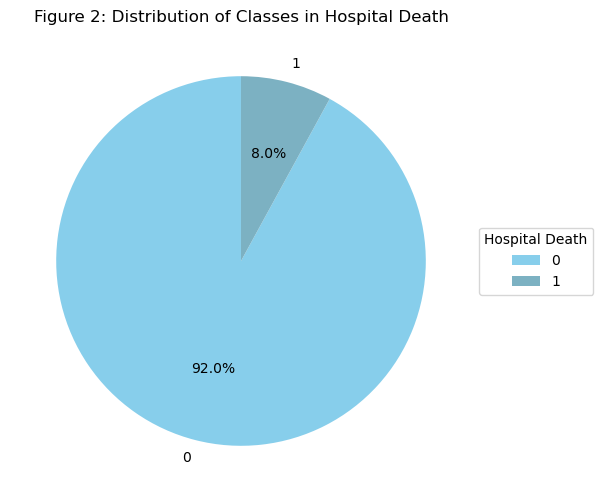

In [11]:
import matplotlib.pyplot as plt

data = cardio_patients

counts = data['hospital_death'].value_counts()

# Defining colors
colors = ['#87CEEB', '#7cb1c2']

# Ploting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Figure 2: Distribution of Classes in Hospital Death')
plt.legend(title='Hospital Death', loc='center left', bbox_to_anchor=(1, 0.5))

# Showing the plot
plt.show()

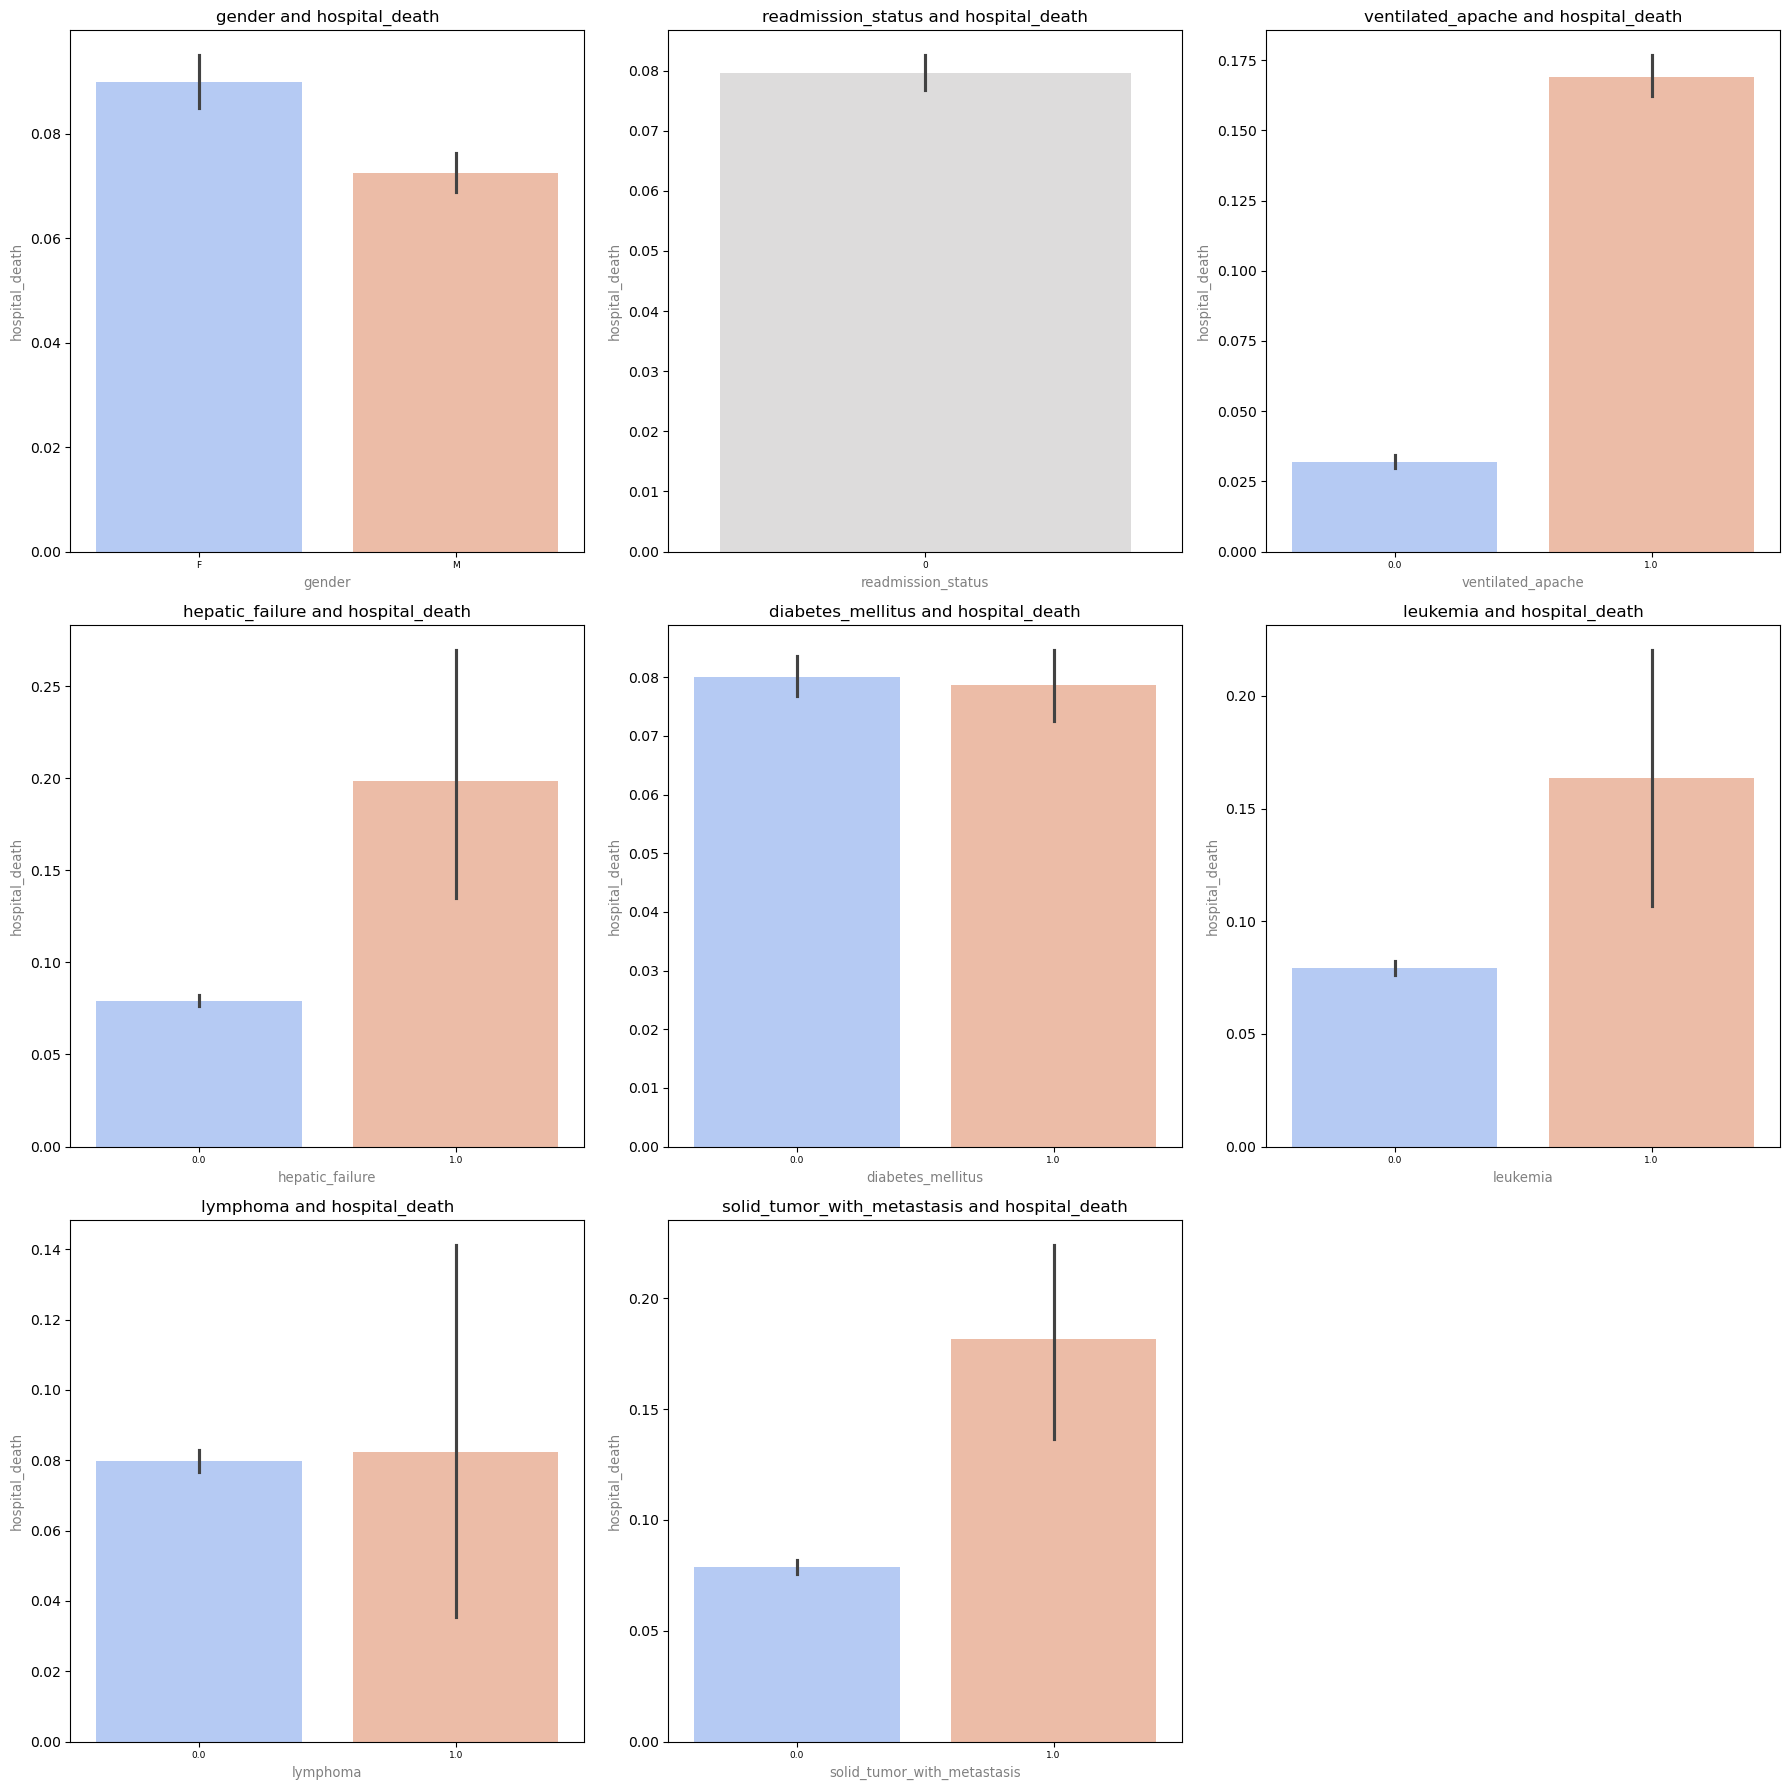

In [12]:
# Grouping variables into binary, ordinal, and categorical
binary_categorical = [item for item in categorical_columns if item != 'hospital_death']

#Setting Y/class

Class= 'hospital_death'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(binary_categorical) // subplots_per_row + 1

# Creating bar plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(binary_categorical):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.barplot(data=data, x=variable_name, y=Class, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adjusting the font size for unit names
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), fontsize=6.5)

# Adding and adjusting lables for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing  empty subplots
for i in range(len(binary_categorical), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()

In [13]:
# categorical columns to drop
to_drop_categorical = [
    'readmission_status',
    'lymphoma',
]

for todo_remove in to_drop_categorical:
    categorical_columns.remove(todo_remove)

categorical_columns

['gender',
 'ventilated_apache',
 'hepatic_failure',
 'diabetes_mellitus',
 'leukemia',
 'solid_tumor_with_metastasis',
 'hospital_death']

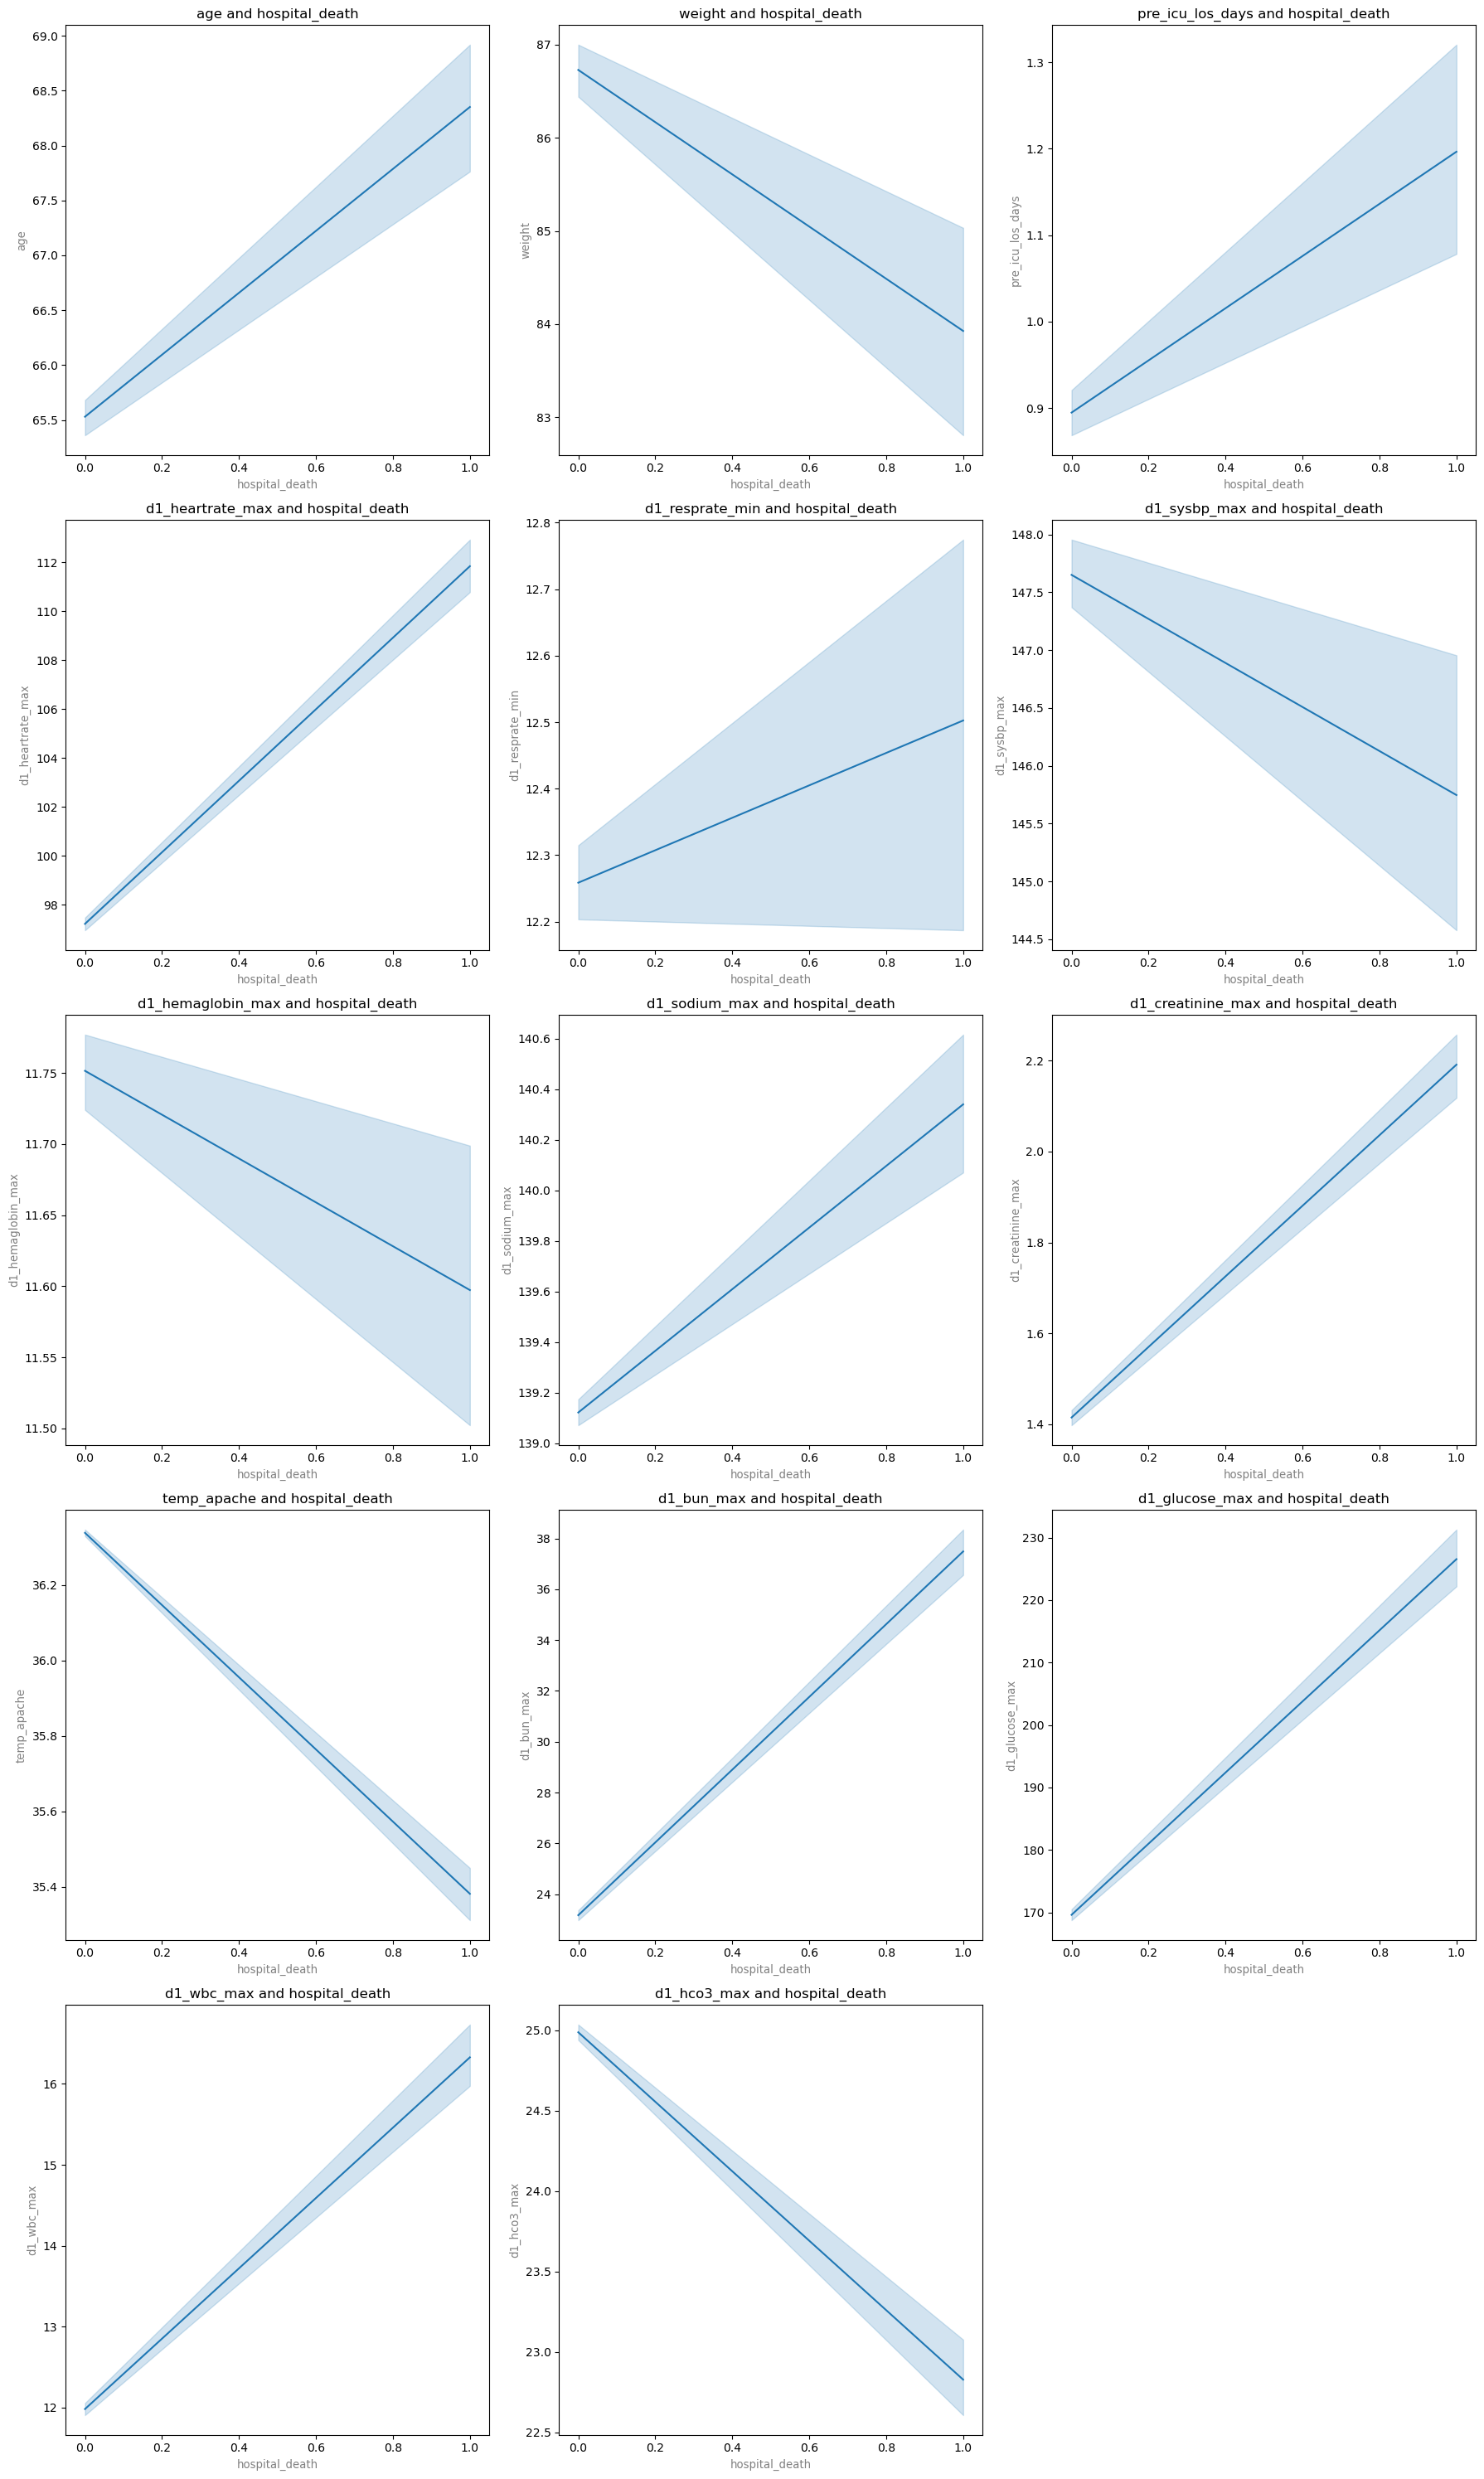

In [14]:
Class = 'hospital_death'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(numerical_columns) // subplots_per_row + 1

# Creating line plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(numerical_columns):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.lineplot(data=data, x=Class, y=variable_name, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adding and adjusting labels for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing empty subplots
for i in range(len(numerical_columns), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()

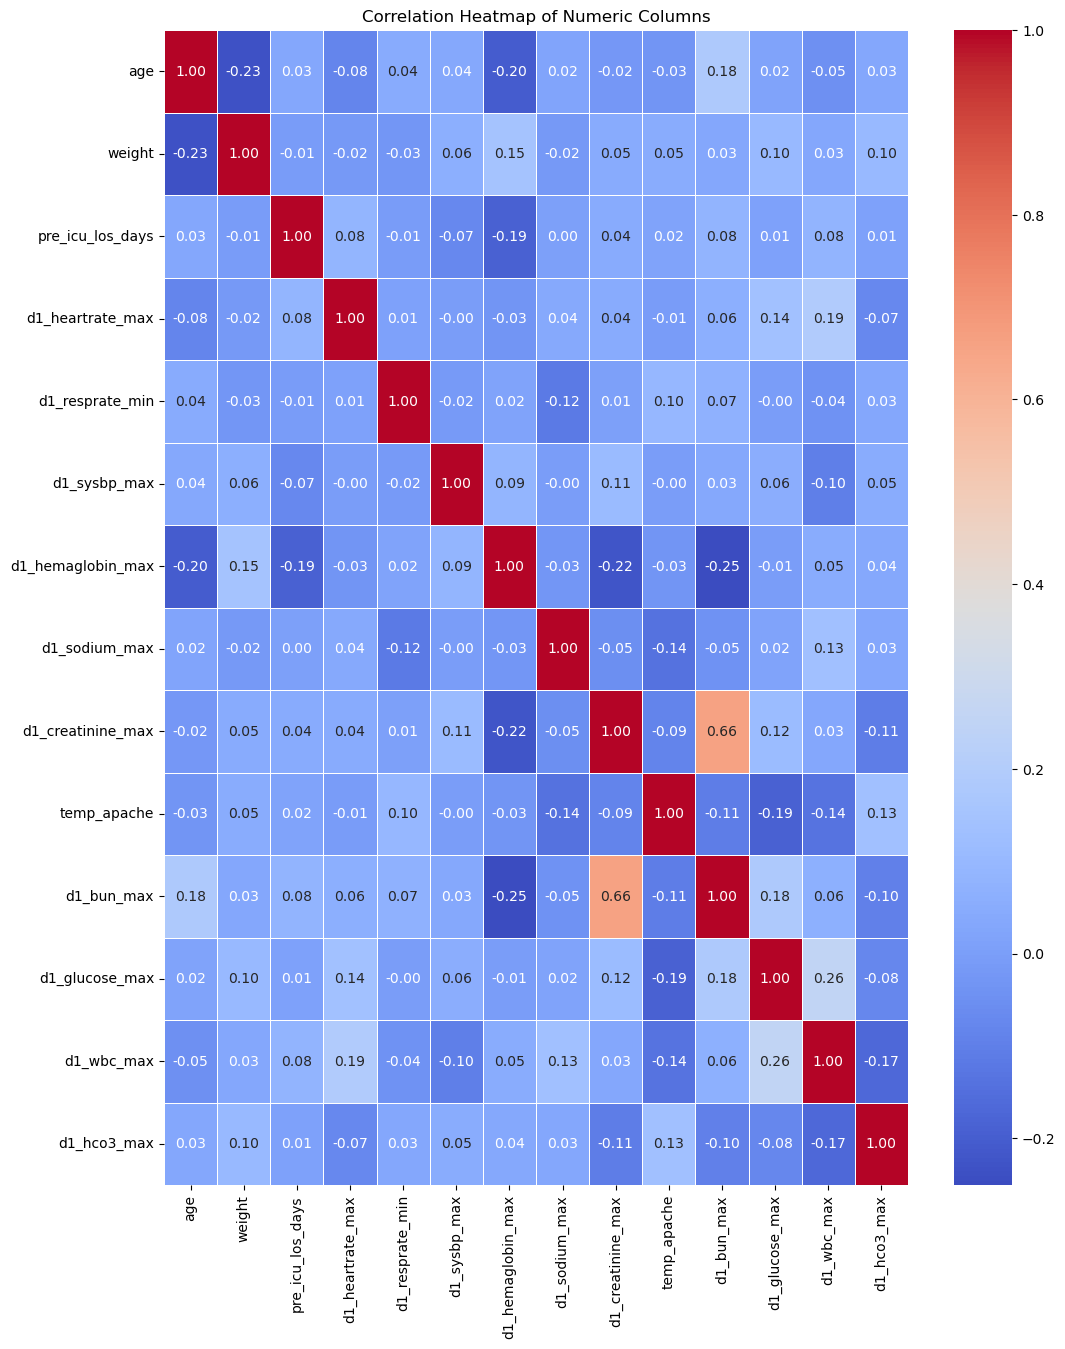

In [15]:
# Creating a DataFrame with only the selected columns
numeric_data = data[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [16]:
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.65:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

print("Pairs of variables with correlation > 0.65:")
for pair in high_correlation_pairs:
    print(pair)

Pairs of variables with correlation > 0.65:
('d1_creatinine_max', 'd1_bun_max')


In [17]:
# correlation remove
numeric_variables_to_drop = [
    'd1_creatinine_max',
]

for todo_remove in numeric_variables_to_drop:
    numerical_columns.remove(todo_remove)

numerical_columns

['age',
 'weight',
 'pre_icu_los_days',
 'd1_heartrate_max',
 'd1_resprate_min',
 'd1_sysbp_max',
 'd1_hemaglobin_max',
 'd1_sodium_max',
 'temp_apache',
 'd1_bun_max',
 'd1_glucose_max',
 'd1_wbc_max',
 'd1_hco3_max']

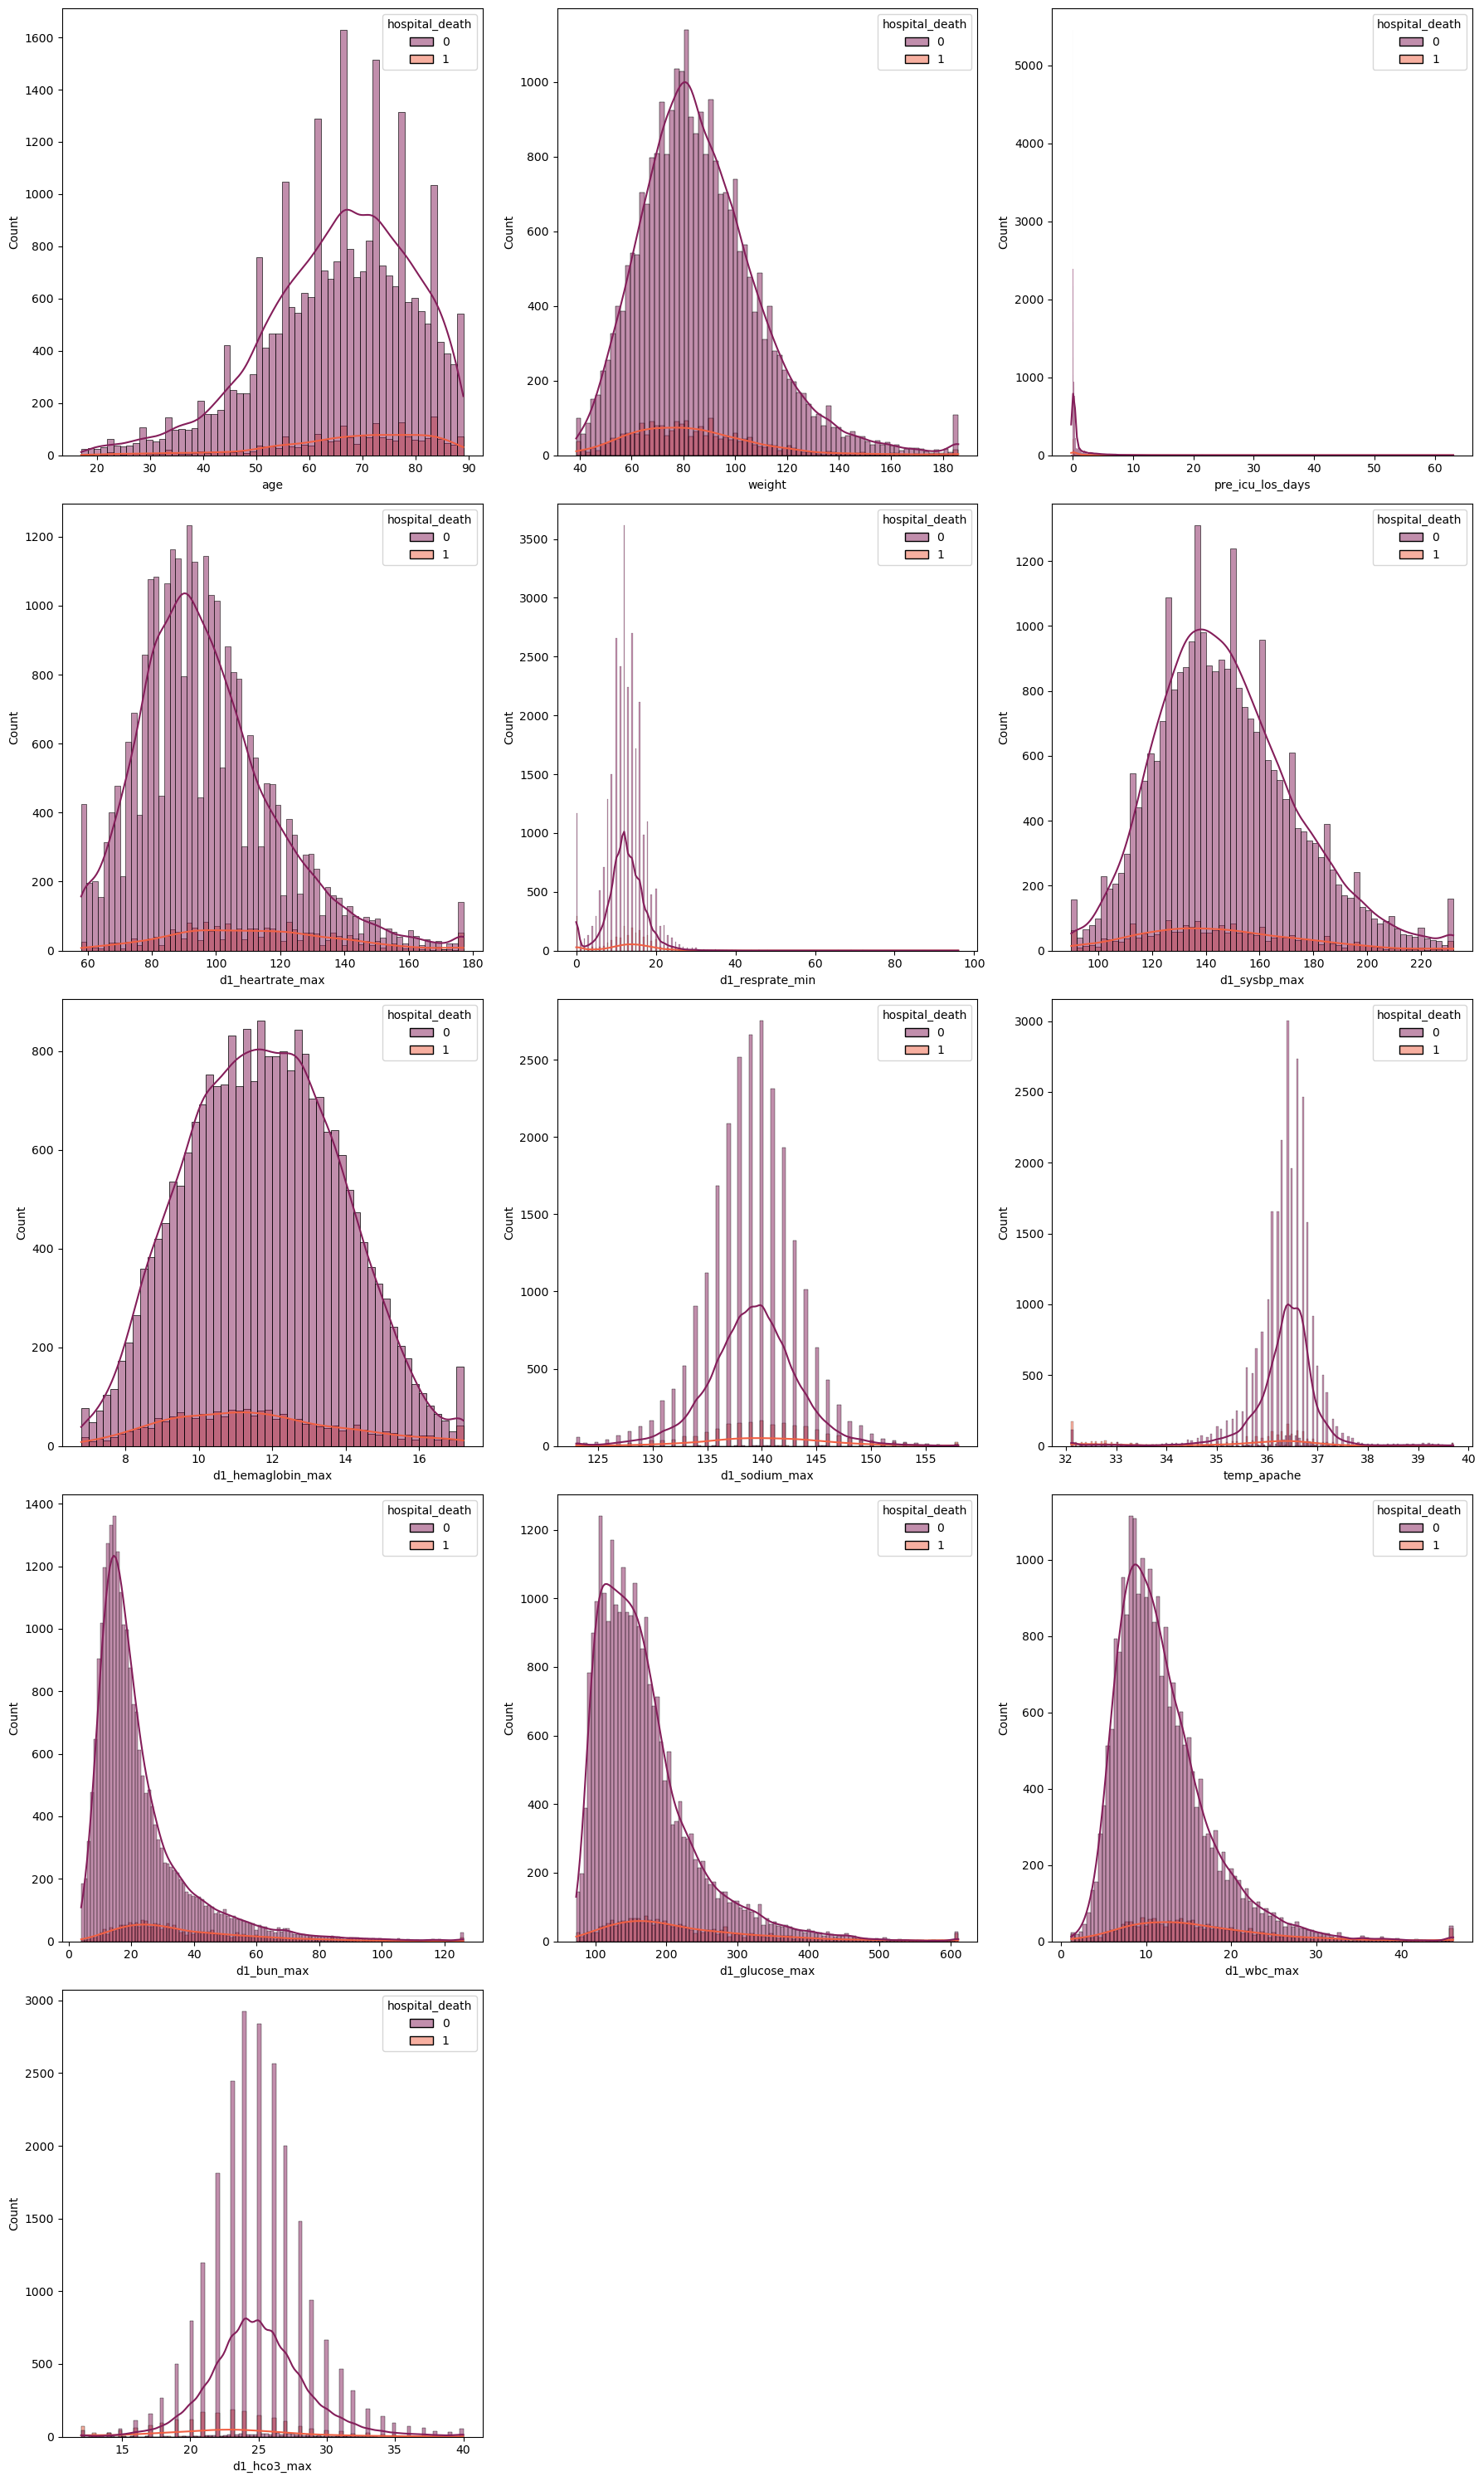

In [18]:
# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(numerical_columns) // subplots_per_row + 1

# Creating a grid of subplots
fig, axs = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

# Creating a copy of the original data
data_copy = data.copy()

# Looping through each feature in numeric variables
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // subplots_per_row
    y = i % subplots_per_row

    # Plot a histogram of the scaled feature split by the Diabetes class
    sns.histplot(data=data_copy, x=column, hue='hospital_death', kde=True, palette='rocket', ax=axs[x][y])

# Removing any empty subplots
for i in range(len(numerical_columns), total_rows * subplots_per_row):
    fig.delaxes(axs[i // subplots_per_row, i % subplots_per_row])

# Display all the subplots
plt.tight_layout()
plt.show()

In [19]:
# drop missing values
data.dropna(inplace=True)

In [20]:
# Defining a Z-score threshold
zscore_threshold = 4

# Initialize a dictionary to store variable names and their respective outlier counts
variables_with_outliers = {}

# Iterate through each continuous variable and identify variables with outliers
for variable_name in numerical_columns:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers_count = sum(abs(z_scores) > zscore_threshold)

    # Store the variable name and outlier count in the dictionary
    variables_with_outliers[variable_name] = outliers_count

# Printing the names of variables with their respective outlier counts
print("Variables with the number of outliers beyond 4 standard deviations:")
total = 0
for variable_name, outliers_count in variables_with_outliers.items():
    print(f"{variable_name}: {outliers_count} observations")
    total += outliers_count

print("Total: ", total)

# Drop outliers
# Compute Z-scores for all numerical columns
z_scores = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

# Keep only rows where all Z-scores are within the threshold
data_no_outliers = data[(np.abs(z_scores) <= zscore_threshold).all(axis=1)]

print(f"\nOriginal data shape: {data.shape}")
print(f"Data shape after outlier removal: {data_no_outliers.shape}")

data = data_no_outliers

Variables with the number of outliers beyond 4 standard deviations:
age: 0 observations
weight: 102 observations
pre_icu_los_days: 201 observations
d1_heartrate_max: 0 observations
d1_resprate_min: 19 observations
d1_sysbp_max: 0 observations
d1_hemaglobin_max: 0 observations
d1_sodium_max: 36 observations
temp_apache: 361 observations
d1_bun_max: 202 observations
d1_glucose_max: 143 observations
d1_wbc_max: 158 observations
d1_hco3_max: 54 observations
Total:  1276

Original data shape: (20661, 23)
Data shape after outlier removal: (19478, 23)


In [21]:
# apply log transform to skewed columns
must_log_transform = [
    # 'pre_icu_los_days', # what does negative columns mean here??
    'd1_bun_max',
    'd1_glucose_max',
    'd1_wbc_max'
]

for column in must_log_transform:
    # Apply log transformation directly
    data[f'log_{column.lower().replace(" ", "_")}'] = np.log(data[column])

cardio_patients = data

In [22]:
# 1. drop missing values:
cardio_patients.dropna(inplace=True)

# 2. mode imputation [before train/test split]
# Apply mode imputation for each column with missing values
# for column in cardio_patients.columns:
#     if cardio_patients[column].isnull().sum() > 0:
#         mode_value = cardio_patients[column].mode()[0]
#         cardio_patients[column].fillna(mode_value, inplace=True)

# Check that missing values are handled
print(cardio_patients.isnull().sum())

age                            0
gender                         0
weight                         0
pre_icu_los_days               0
readmission_status             0
ventilated_apache              0
d1_heartrate_max               0
d1_resprate_min                0
d1_sysbp_max                   0
d1_hemaglobin_max              0
d1_sodium_max                  0
d1_creatinine_max              0
hepatic_failure                0
diabetes_mellitus              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
temp_apache                    0
d1_bun_max                     0
d1_glucose_max                 0
d1_wbc_max                     0
d1_hco3_max                    0
hospital_death                 0
log_d1_bun_max                 0
log_d1_glucose_max             0
log_d1_wbc_max                 0
dtype: int64


In [23]:
categorical_columns_without_gender = [col for col in categorical_columns if col != 'gender']
cardio_patients[categorical_columns_without_gender] = cardio_patients[categorical_columns_without_gender].astype(int)
cardio_patients[numerical_columns] = cardio_patients[numerical_columns].astype(float)

In [24]:
cardio_patients = cardio_patients.drop(columns=must_log_transform, axis=1)

In [25]:
cardio_patients.dtypes

age                            float64
gender                          object
weight                         float64
pre_icu_los_days               float64
readmission_status               int64
ventilated_apache                int32
d1_heartrate_max               float64
d1_resprate_min                float64
d1_sysbp_max                   float64
d1_hemaglobin_max              float64
d1_sodium_max                  float64
d1_creatinine_max              float64
hepatic_failure                  int32
diabetes_mellitus                int32
leukemia                         int32
lymphoma                       float64
solid_tumor_with_metastasis      int32
temp_apache                    float64
d1_hco3_max                    float64
hospital_death                   int32
log_d1_bun_max                 float64
log_d1_glucose_max             float64
log_d1_wbc_max                 float64
dtype: object

In [26]:
# RUS - faster training time, less performance

X_S = cardio_patients.drop('hospital_death', axis=1)
y_S = cardio_patients['hospital_death']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# Application of RUS for downsampling on the training data
rus = RandomUnderSampler()
X_train_resampled_S, y_train_resampled_S = rus.fit_resample(X_train_S, y_train_S)

ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), ['gender']),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled, X_test, X_External
X_train_resampled_encoded_S = ct.fit_transform(X_train_resampled_S)
X_test_S = ct.transform(X_test_S)

In [27]:
# ROS - slow training time, better performance.
from imblearn.over_sampling import RandomOverSampler

X_S = cardio_patients.drop('hospital_death', axis=1)
y_S = cardio_patients['hospital_death']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# Apply RandomOverSampler for upsampling on the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled_S, y_train_resampled_S = ros.fit_resample(X_train_S, y_train_S)

ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), ['gender']),
    ],
    remainder='passthrough'
)

# Apply the one-hot encoding transformation to resampled training data and test data
X_train_resampled_encoded_S = ct.fit_transform(X_train_resampled_S, y_train_resampled_S)
X_test_S = ct.transform(X_test_S)


In [28]:
scaler = StandardScaler()
X_train_resampled_encoded_scaled_S = scaler.fit_transform(X_train_resampled_encoded_S)
X_test_scaled = scaler.transform(X_test_S)

In [29]:
# Initialize an LogisticRegression regressor
lr = LogisticRegression()

# Creating a pipeline that applies the LogisticRegression regressor
model_for_LogisticRegression = Pipeline([
    ('lr', lr)
])

# Define a dictionary of hyperparameter values to search over.
param_dist_LogisticRegression = {
    'lr__solver': ['sag'], # ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'lr__C': [0.2], # [i/10 for i in range(1,11)],
    'lr__penalty': ['l2'] ,# ['l1', 'l2', 'elasticnet', None],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_LogisticRegression = GridSearchCV(
    model_for_LogisticRegression, param_grid=param_dist_LogisticRegression, cv=skf)

# Train Grid Search on the training data
random_search_LogisticRegression.fit(X_train_resampled_encoded_S, y_train_resampled_S)

# Extract results into a DataFrame
results_LogisticRegression = pd.DataFrame(random_search_LogisticRegression.cv_results_)

# Display the set of parameters that achieved the best score
results_LogisticRegression[results_LogisticRegression['rank_test_score'] == 1]
random_search_LogisticRegression.best_params_

{'lr__C': 0.2, 'lr__penalty': 'l2', 'lr__solver': 'sag'}

In [30]:
best_config = random_search_LogisticRegression.best_params_
model_for_LogisticRegression = model_for_LogisticRegression.set_params(
    lr__C=best_config["lr__C"],
    lr__penalty=best_config["lr__penalty"],
    lr__solver=best_config["lr__solver"],
)

# Refit the model using the training data
LR_model = model_for_LogisticRegression.fit(X_train_resampled_encoded_S, y_train_resampled_S)

In [31]:
def evaluate_model_with_cross_val(model, X, y):
    """
    Evaluates a classification model using 5-fold cross-validation and prints performance metrics.

    Parameters:
    - model: The classification model to evaluate.
    - X: Feature set.
    - y: Target labels.

    Returns:
    - results: Dictionary containing all calculated metrics.
    """
    # Cross-validated predictions with fixed 5 folds
    predicted_labels = cross_val_predict(model, X, y, cv=5)

    # Metrics
    conf_matrix = confusion_matrix(y, predicted_labels)
    class_report = classification_report(y, predicted_labels)
    accuracy = accuracy_score(y, predicted_labels)
    precision = precision_score(y, predicted_labels)
    recall = recall_score(y, predicted_labels)
    f1 = f1_score(y, predicted_labels)

    # Print results
    print("Model Evaluation Results")
    print("A. Confusion Matrix:")
    print(conf_matrix)
    print("B. Classification Report:")
    print(class_report)
    print("C. Accuracy: {:.2f}".format(accuracy))
    print("D. Precision: {:.2f}".format(precision))
    print("E. Recall (Sensitivity): {:.2f}".format(recall))
    print("F. F1 Score: {:.2f}".format(f1))

    # Optionally return metrics
    results = {
        "confusion_matrix": conf_matrix,
        "classification_report": class_report,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    return results

train_results_LR = evaluate_model_with_cross_val(
    LR_model,
    X_train_resampled_encoded_S,
    y_train_resampled_S,
)

Model Evaluation Results
A. Confusion Matrix:
[[11147  3419]
 [ 3431 11135]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76     14566
           1       0.77      0.76      0.76     14566

    accuracy                           0.76     29132
   macro avg       0.76      0.76      0.76     29132
weighted avg       0.76      0.76      0.76     29132

C. Accuracy: 0.76
D. Precision: 0.77
E. Recall (Sensitivity): 0.76
F. F1 Score: 0.76


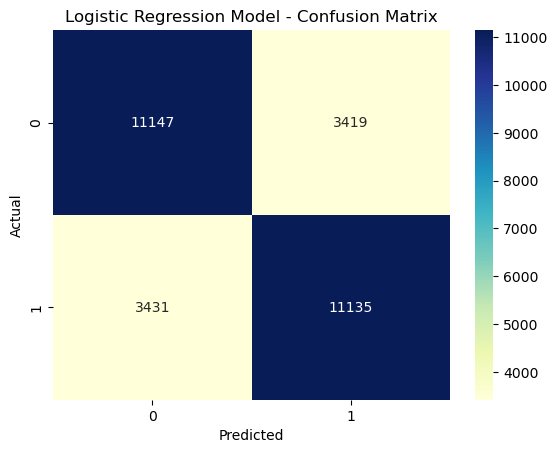

In [32]:
sns.heatmap(train_results_LR["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('Logistic Regression Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [33]:
def draw_roc(model, x , y, set_title, model_name):
  predicted_probs = model.predict_proba(x)[:, 1]
  # Calculate ROC-AUC on the test set
  roc_auc_test = roc_auc_score(y, predicted_probs)
  print(f"{set_title} ROC-AUC: {roc_auc_test:.4f}")
  # Calculate ROC curve on the test set
  fpr_test, tpr_test, _ = roc_curve(y, predicted_probs)
  # Plot ROC curve for the test set
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_test, tpr_test, label=f'{set_title} ROC Curve (AUC = {roc_auc_test:.2f})')
  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{set_title} Set - {model_name} - (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

  return roc_auc_test, fpr_test, tpr_test

def performance_metrics(model, x, y, set_title, model_name):
  y_pred_test = model.predict(x)
  # Calculating metrics
  accuracy_test = accuracy_score(y, y_pred_test)
  precision_test = precision_score(y, y_pred_test)
  recall_test = recall_score(y, y_pred_test)
  f1_test = f1_score(y, y_pred_test)
  conf_matrix_test = confusion_matrix(y, y_pred_test)

  # Printing the evaluation metrics
  print(f"{model_name} Model - {set_title} Set- Confusion Matrix/Classification Report")
  print("Accuracy: {:.2f}".format(accuracy_test))
  print("Precision: {:.2f}".format(precision_test))
  print("Recall (Sensitivity): {:.2f}".format(recall_test))
  print("F1 Score: {:.2f}".format(f1_test))
  print("Confusion Matrix:")
  print(conf_matrix_test)

  return accuracy_test, precision_test, recall_test, f1_test

Train ROC-AUC: 0.8461


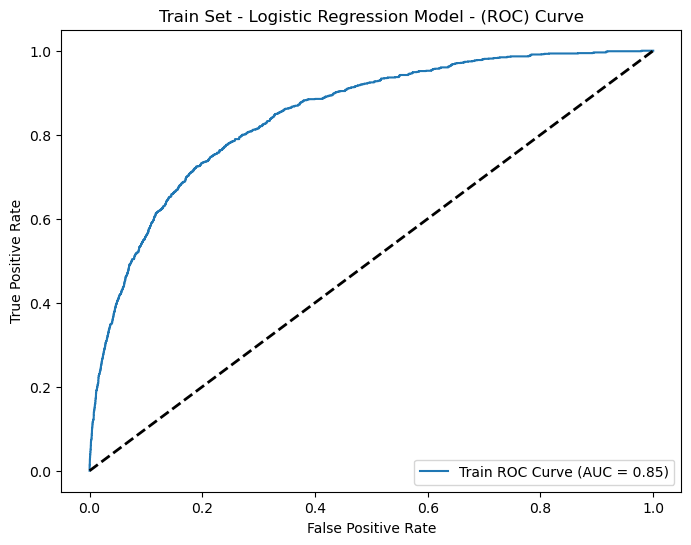

In [34]:
roc_auc_train_LR, fpr_train_LR, tpr_train_LR = draw_roc(LR_model, X_train_resampled_encoded_S, y_train_resampled_S, 'Train', 'Logistic Regression Model')

In [35]:
test_results_LR = evaluate_model_with_cross_val(
    LR_model,
    X_test_scaled,
    y_test_S,
)

Model Evaluation Results
A. Confusion Matrix:
[[3634   25]
 [ 209   28]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3659
           1       0.53      0.12      0.19       237

    accuracy                           0.94      3896
   macro avg       0.74      0.56      0.58      3896
weighted avg       0.92      0.94      0.92      3896

C. Accuracy: 0.94
D. Precision: 0.53
E. Recall (Sensitivity): 0.12
F. F1 Score: 0.19


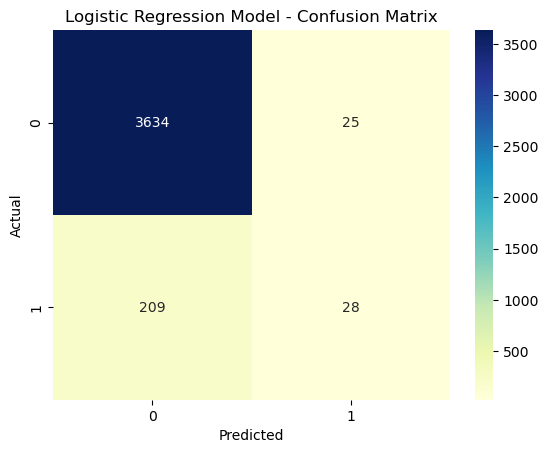

In [36]:
sns.heatmap(test_results_LR["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('Logistic Regression Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Test ROC-AUC: 0.8215


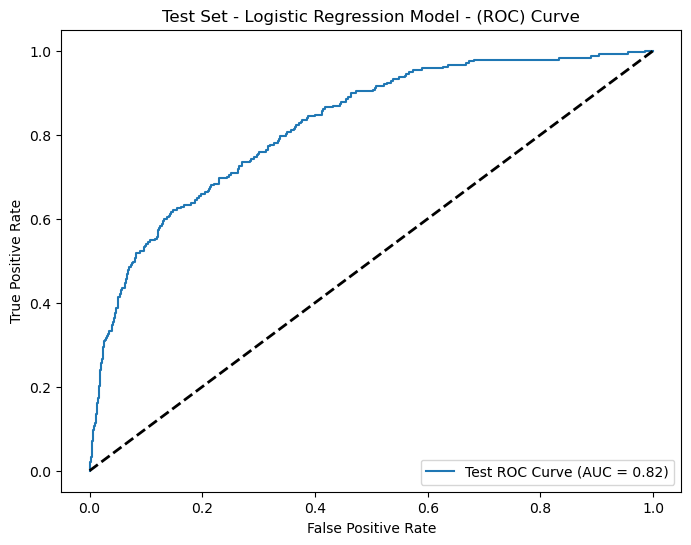

In [37]:
roc_auc_test_LR, fpr_test_LR, tpr_test_LR = draw_roc(LR_model, X_test_scaled, y_test_S, 'Test', 'Logistic Regression Model')

KNN

In [38]:
#Creating a list to store the cross-validation scores for different values of k
k_grid = list(range(1, 30))  # Try k values from 1 to 20, for example
cv_scores = []

In [39]:
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(knn, X_train_resampled_encoded_scaled_S, y_train_resampled_S, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

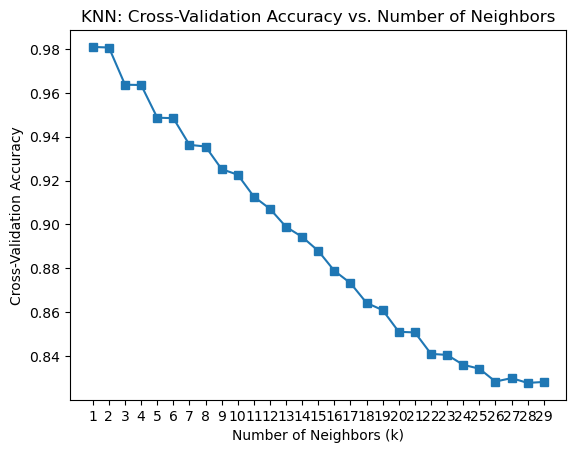

In [40]:
#Plotting the cross-validation scores to identify the optimal K
plt.plot(k_grid, cv_scores, marker = "s")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Cross-Validation Accuracy vs. Number of Neighbors')
plt.xticks(np.arange(min(k_grid), max(k_grid) + 1, 1))
plt.show()


In [41]:
# Print K and the corresponding cross-validation scores
for k, score in zip(k_grid, cv_scores):
    print(f"K = {k}, Cross-Validation Accuracy = {score:.3f}")

K = 1, Cross-Validation Accuracy = 0.981
K = 2, Cross-Validation Accuracy = 0.981
K = 3, Cross-Validation Accuracy = 0.964
K = 4, Cross-Validation Accuracy = 0.964
K = 5, Cross-Validation Accuracy = 0.949
K = 6, Cross-Validation Accuracy = 0.948
K = 7, Cross-Validation Accuracy = 0.936
K = 8, Cross-Validation Accuracy = 0.936
K = 9, Cross-Validation Accuracy = 0.925
K = 10, Cross-Validation Accuracy = 0.923
K = 11, Cross-Validation Accuracy = 0.913
K = 12, Cross-Validation Accuracy = 0.907
K = 13, Cross-Validation Accuracy = 0.899
K = 14, Cross-Validation Accuracy = 0.894
K = 15, Cross-Validation Accuracy = 0.888
K = 16, Cross-Validation Accuracy = 0.879
K = 17, Cross-Validation Accuracy = 0.873
K = 18, Cross-Validation Accuracy = 0.864
K = 19, Cross-Validation Accuracy = 0.861
K = 20, Cross-Validation Accuracy = 0.851
K = 21, Cross-Validation Accuracy = 0.851
K = 22, Cross-Validation Accuracy = 0.841
K = 23, Cross-Validation Accuracy = 0.840
K = 24, Cross-Validation Accuracy = 0.836
K

In [42]:
# Grid search
# Initialize an LogisticRegression regressor

knn = KNeighborsClassifier(n_neighbors=9)

# Creating a pipeline that applies the LogisticRegression regressor
model_for_KNN = Pipeline([
    ('knn', knn)
])

# Define a dictionary of hyperparameter values to search over.
param_dist_KNN = {
    'knn__metric': ['cosine'], # ['cityblock', 'manhattan', 'cosine', 'euclidean', 'haversine', 'nan_euclidean', 'l1', 'l2'],
    'knn__algorithm': ['auto'], # ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform'], # ['uniform', 'distance'],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_KNN = GridSearchCV(
    model_for_KNN, param_grid=param_dist_KNN, cv=skf)

# Train Grid Search on the training data
random_search_KNN.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

# Extract results into a DataFrame
results_KNN = pd.DataFrame(random_search_KNN.cv_results_)

# Display the set of parameters that achieved the best score
results_KNN[results_KNN['rank_test_score'] == 1]
random_search_KNN.best_params_

{'knn__algorithm': 'auto', 'knn__metric': 'cosine', 'knn__weights': 'uniform'}

In [43]:
# select one of the best configs

best_config = random_search_KNN.best_params_
model_for_KNN = model_for_KNN.set_params(
    knn__metric=best_config["knn__metric"],
    knn__algorithm=best_config["knn__algorithm"],
    knn__weights=best_config["knn__weights"],
)

# Refit the model using the training data
knn = model_for_KNN.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

Model Evaluation Results
A. Confusion Matrix:
[[11369  3197]
 [   67 14499]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     14566
           1       0.82      1.00      0.90     14566

    accuracy                           0.89     29132
   macro avg       0.91      0.89      0.89     29132
weighted avg       0.91      0.89      0.89     29132

C. Accuracy: 0.89
D. Precision: 0.82
E. Recall (Sensitivity): 1.00
F. F1 Score: 0.90


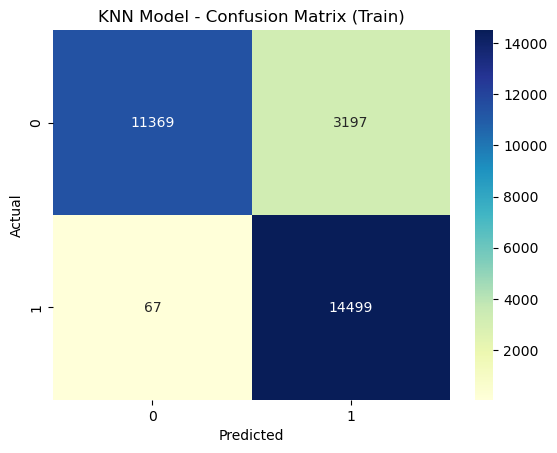

Train ROC-AUC: 0.5192


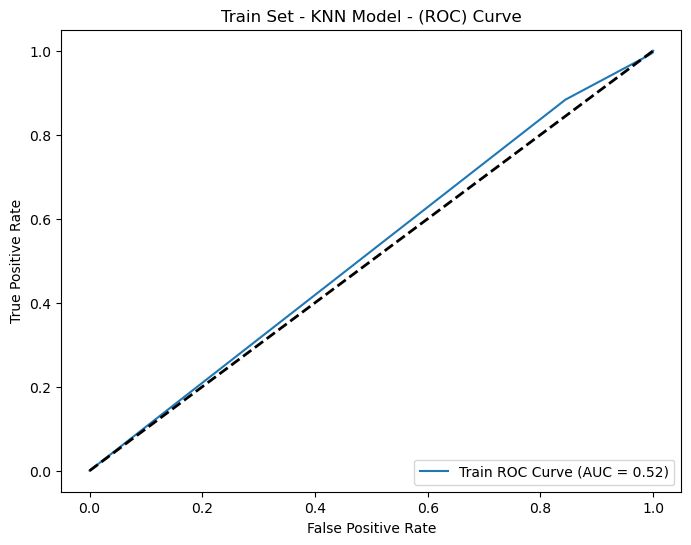

In [44]:
train_results_knn = evaluate_model_with_cross_val(
    knn,
    X_train_resampled_encoded_S,
    y_train_resampled_S,
)

sns.heatmap(train_results_knn["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('KNN Model - Confusion Matrix (Train)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_train_knn, fpr_train_knn, tpr_train_knn = draw_roc(knn, X_train_resampled_encoded_S, y_train_resampled_S, 'Train', 'KNN Model')

Model Evaluation Results
A. Confusion Matrix:
[[3650    9]
 [ 230    7]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3659
           1       0.44      0.03      0.06       237

    accuracy                           0.94      3896
   macro avg       0.69      0.51      0.51      3896
weighted avg       0.91      0.94      0.91      3896

C. Accuracy: 0.94
D. Precision: 0.44
E. Recall (Sensitivity): 0.03
F. F1 Score: 0.06


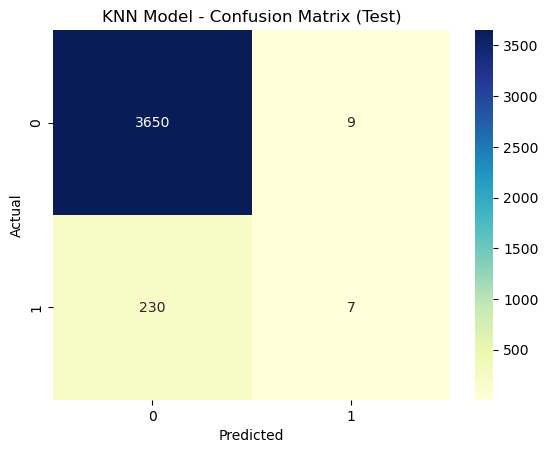

Test ROC-AUC: 0.7519


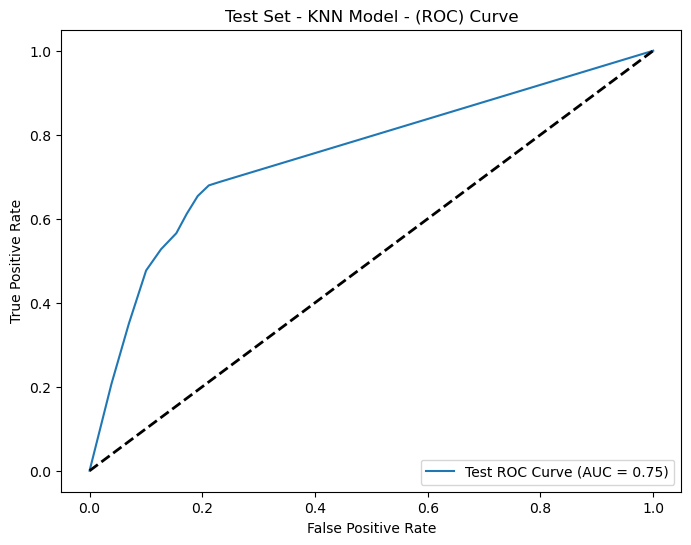

In [45]:
_X = X_test_scaled
_Y = y_test_S
model = knn

test_results_knn = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(test_results_knn["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('KNN Model - Confusion Matrix (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_test_knn, fpr_test_knn, tpr_test_knn = draw_roc(model, _X, _Y, 'Test', 'KNN Model')

In [46]:
# Initialize an SVM classifier
SVM = SVC(class_weight=None, probability=True)


# Creating a pipeline that applies the Decision Tree classifier
model_for_SVM = Pipeline([
    ('svm', SVM)
])

# Define a dictionary of hyperparameter values to search over.
param_dist_SVM = {
    'svm__C': [10], # [10**(i) for i in range(-2,2)], # [10**(i) for i in range(-3,4)],
    'svm__kernel': ['rbf'], # ['rbf', 'linear', 'poly', 'sigmoid'],
    'svm__gamma': [0.1], #[10**(i) for i in range(-3,1)] # [10**(i) for i in range(-6,2)],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_SVM = GridSearchCV(
    model_for_SVM, param_grid=param_dist_SVM, cv=skf)

# Train Grid Search on the training data
random_search_SVM.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

# Extract results into a DataFrame
results_SVM = pd.DataFrame(random_search_SVM.cv_results_)

# Display the set of parameters that achieved the best score
results_SVM[results_SVM['rank_test_score'] == 1]
print("Best Config: ", random_search_SVM.best_params_)

best_config = random_search_SVM.best_params_

model_for_SVM = model_for_SVM.set_params(
    svm__C=best_config["svm__C"],
    svm__gamma=best_config["svm__gamma"],
    svm__kernel=best_config["svm__kernel"],
)
# Refit the model using the training data
model_for_SVM.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

Best Config:  {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


Pipeline(steps=[('svm', SVC(C=10, gamma=0.1, probability=True))])

Model Evaluation Results
A. Confusion Matrix:
[[13841   725]
 [   24 14542]]
B. Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     14566
           1       0.95      1.00      0.97     14566

    accuracy                           0.97     29132
   macro avg       0.98      0.97      0.97     29132
weighted avg       0.98      0.97      0.97     29132

C. Accuracy: 0.97
D. Precision: 0.95
E. Recall (Sensitivity): 1.00
F. F1 Score: 0.97


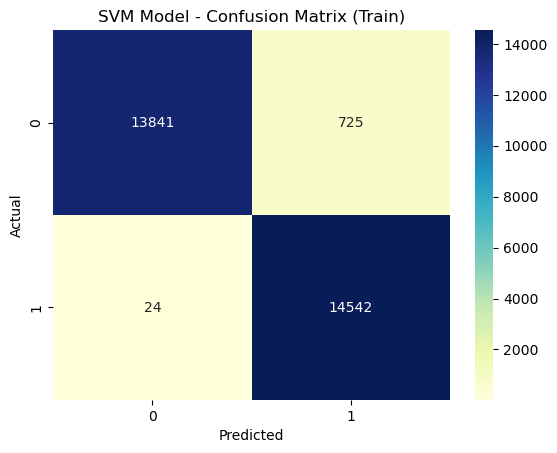

Train ROC-AUC: 0.9999


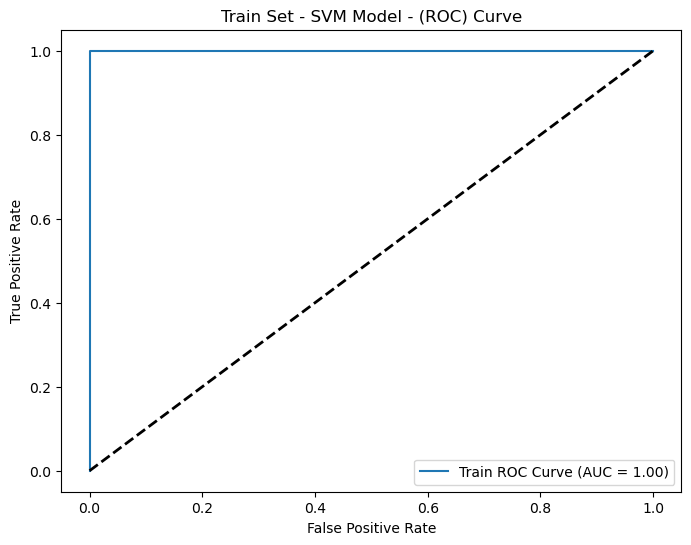

In [47]:
_X = X_train_resampled_encoded_scaled_S
_Y = y_train_resampled_S
model = model_for_SVM

train_results_svm = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(train_results_svm["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('SVM Model - Confusion Matrix (Train)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_train_svm, fpr_train_svm, tpr_train_svm = draw_roc(model, _X, _Y, 'Train', 'SVM Model')

Model Evaluation Results
A. Confusion Matrix:
[[3589   70]
 [ 209   28]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3659
           1       0.29      0.12      0.17       237

    accuracy                           0.93      3896
   macro avg       0.62      0.55      0.56      3896
weighted avg       0.90      0.93      0.91      3896

C. Accuracy: 0.93
D. Precision: 0.29
E. Recall (Sensitivity): 0.12
F. F1 Score: 0.17


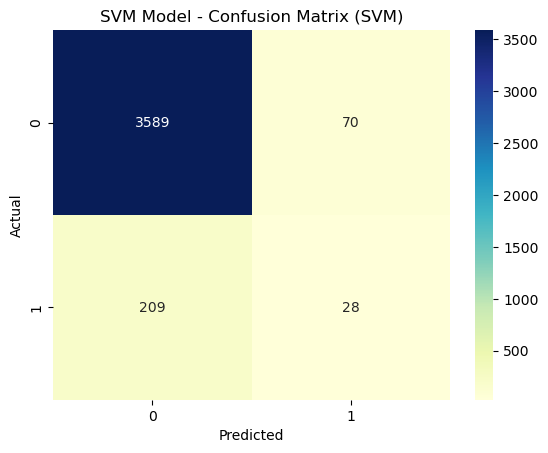

Test ROC-AUC: 0.8003


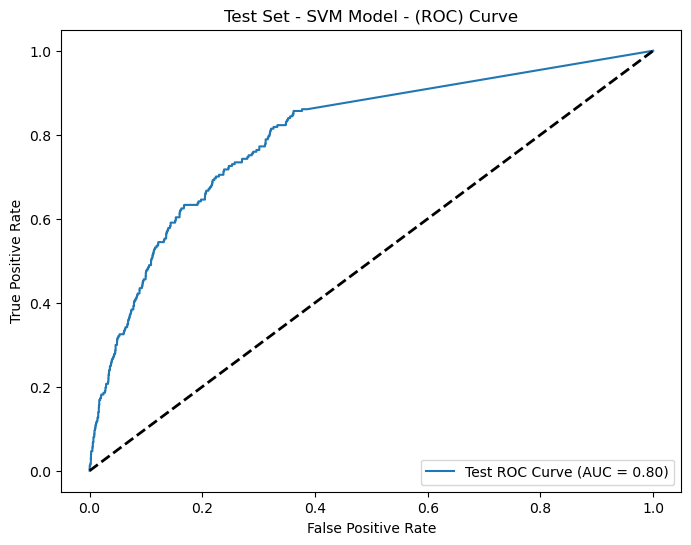

In [48]:
_X = X_test_scaled
_Y = y_test_S
model = model_for_SVM

test_results_svm = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(test_results_svm["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('SVM Model - Confusion Matrix (SVM)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_test_svm, fpr_test_svm, tpr_test_svm = draw_roc(model, _X, _Y, 'Test', 'SVM Model')

In [49]:
# Initializing a Decision Tree classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
dt = DecisionTreeClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Decision Tree classifier
model_for_dt = Pipeline([
    ('DT', dt)
])

# Fitting the model on the training data
model_for_dt.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

Pipeline(steps=[('DT', DecisionTreeClassifier(criterion='entropy'))])

In [50]:
# Define the hyperparameter values that should be tested
param_dist_DT = {
    "DT__max_depth" : [7], #[3, 5, 7, 10, 15, 20],
    "DT__min_samples_leaf" : [20], # [3, 5, 7, 10, 15, 20],
    "DT__splitter" : ['best'], # ['best', 'random'],
    "DT__max_features" : ['sqrt'], #['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_DT = GridSearchCV(
    model_for_dt, param_grid=param_dist_DT, cv=skf)

# Train Grid Search on the training data
random_search_DT.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

# Extract results into a DataFrame
results_DT = pd.DataFrame(random_search_DT.cv_results_)

# Display the set of parameters that achieved the best score
results_DT[results_DT['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search
print(random_search_DT.best_params_)

# Update the model's hyperparameters to the best found during Grid Search
best_config = random_search_DT.best_params_
model_for_dt = model_for_dt.set_params(
    DT__max_depth=best_config["DT__max_depth"],
    DT__max_features=best_config["DT__max_features"],
    DT__min_samples_leaf=best_config["DT__min_samples_leaf"],
    DT__splitter=best_config["DT__splitter"],
)
# Refit the model using the training data
model_for_dt = model_for_dt.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

{'DT__max_depth': 7, 'DT__max_features': 'sqrt', 'DT__min_samples_leaf': 20, 'DT__splitter': 'best'}


Model Evaluation Results
A. Confusion Matrix:
[[11139  3427]
 [ 2852 11714]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     14566
           1       0.77      0.80      0.79     14566

    accuracy                           0.78     29132
   macro avg       0.78      0.78      0.78     29132
weighted avg       0.78      0.78      0.78     29132

C. Accuracy: 0.78
D. Precision: 0.77
E. Recall (Sensitivity): 0.80
F. F1 Score: 0.79


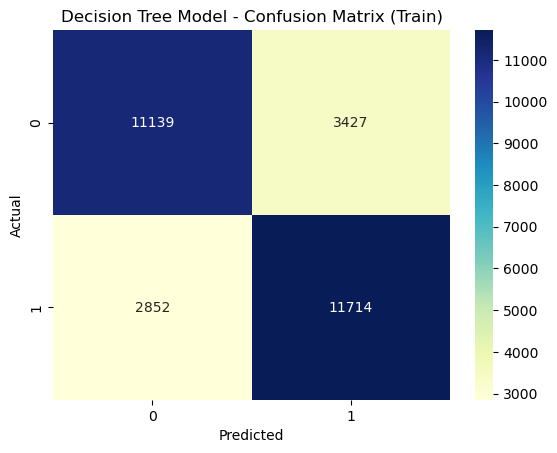

Train ROC-AUC: 0.8697


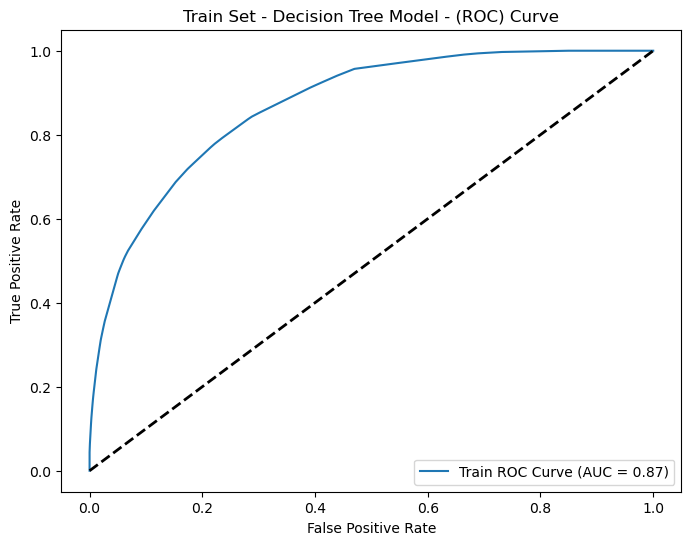

Model Evaluation Results
A. Confusion Matrix:
[[3641   18]
 [ 218   19]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3659
           1       0.51      0.08      0.14       237

    accuracy                           0.94      3896
   macro avg       0.73      0.54      0.55      3896
weighted avg       0.92      0.94      0.92      3896

C. Accuracy: 0.94
D. Precision: 0.51
E. Recall (Sensitivity): 0.08
F. F1 Score: 0.14


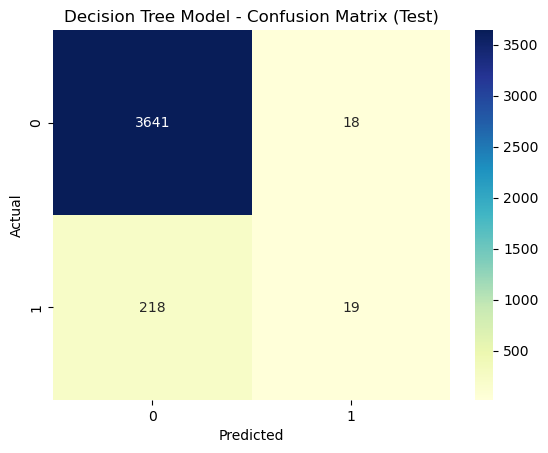

Test ROC-AUC: 0.8256


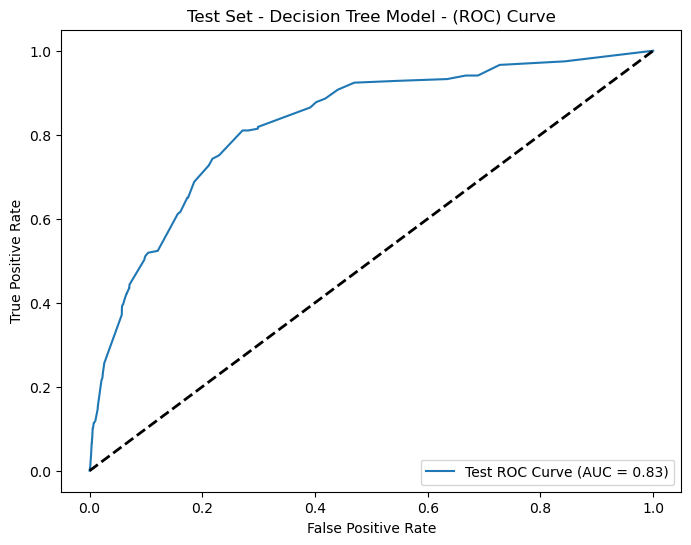

In [51]:
_X = X_train_resampled_encoded_scaled_S
_Y = y_train_resampled_S
model = model_for_dt

train_results_dt = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(train_results_dt["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('Decision Tree Model - Confusion Matrix (Train)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_train_dt, fpr_train_dt, tpr_train_dt = draw_roc(model, _X, _Y, 'Train', 'Decision Tree Model')

_X = X_test_scaled
_Y = y_test_S

test_results_dt = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(test_results_dt["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('Decision Tree Model - Confusion Matrix (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_test_dt, fpr_test_dt, tpr_test_dt = draw_roc(model, _X, _Y, 'Test', 'Decision Tree Model')

In [52]:
# Initializing a Random Forest classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
rf = RandomForestClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Random Forest
model_for_rf = Pipeline([
    ('random_forest', rf)
])

In [53]:
# Define the hyperparameter values that should be tested

param_dist_RF = {
    "random_forest__n_estimators" : [200], # [100, 150, 200],
    "random_forest__max_depth" : [10], # [3, 5, 7, 10],
    "random_forest__min_samples_leaf" : [5], # [3, 5, 7, 10],
    "random_forest__max_features" : ['log2'], # ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_RF = GridSearchCV(
    model_for_rf,
    param_grid=param_dist_RF,
    cv=skf,
    # verbose=1
    )

# Train Grid Search on the training data
random_search_RF.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

# Extract results into a DataFrame
results_RF = pd.DataFrame(random_search_RF.cv_results_)

# Display the set of parameters that achieved the best score
results_RF[results_RF['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search for RF
print(random_search_RF.best_params_)

# Update the model's hyperparameters to the best found during Grid Search
best_config = random_search_RF.best_params_
model_for_rf = model_for_rf.set_params(
    random_forest__max_depth=best_config["random_forest__max_depth"],
    random_forest__max_features=best_config["random_forest__max_features"],
    random_forest__min_samples_leaf=best_config["random_forest__min_samples_leaf"],
    random_forest__n_estimators=best_config["random_forest__n_estimators"],
)

# Refit the model using the training data
model_for_rf = model_for_rf.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

{'random_forest__max_depth': 10, 'random_forest__max_features': 'log2', 'random_forest__min_samples_leaf': 5, 'random_forest__n_estimators': 200}


Model Evaluation Results
A. Confusion Matrix:
[[13086  1480]
 [  837 13729]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     14566
           1       0.90      0.94      0.92     14566

    accuracy                           0.92     29132
   macro avg       0.92      0.92      0.92     29132
weighted avg       0.92      0.92      0.92     29132

C. Accuracy: 0.92
D. Precision: 0.90
E. Recall (Sensitivity): 0.94
F. F1 Score: 0.92


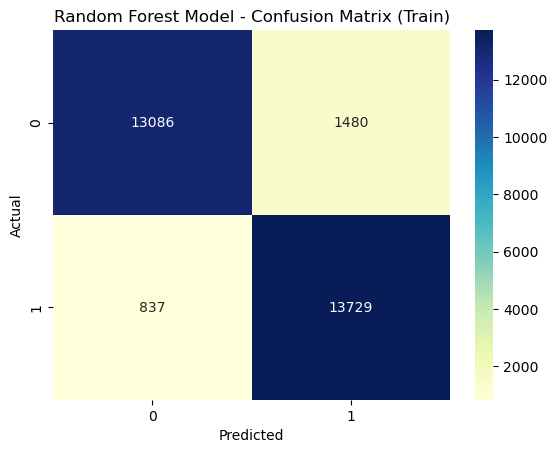

Train ROC-AUC: 0.9860


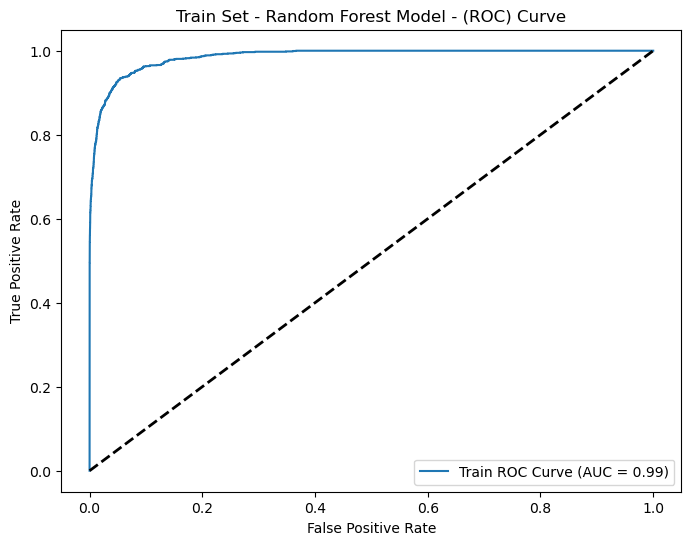

Model Evaluation Results
A. Confusion Matrix:
[[3655    4]
 [ 229    8]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3659
           1       0.67      0.03      0.06       237

    accuracy                           0.94      3896
   macro avg       0.80      0.52      0.52      3896
weighted avg       0.92      0.94      0.91      3896

C. Accuracy: 0.94
D. Precision: 0.67
E. Recall (Sensitivity): 0.03
F. F1 Score: 0.06


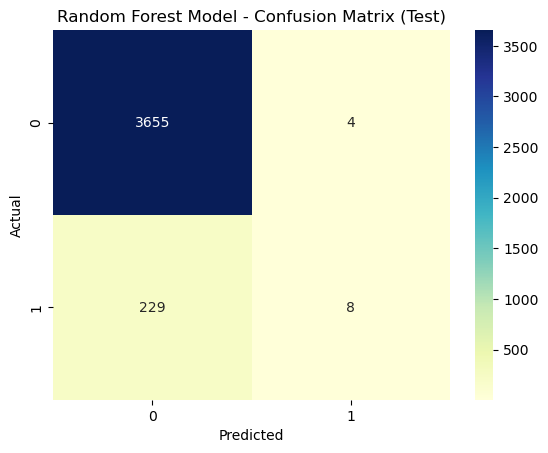

Test ROC-AUC: 0.8796


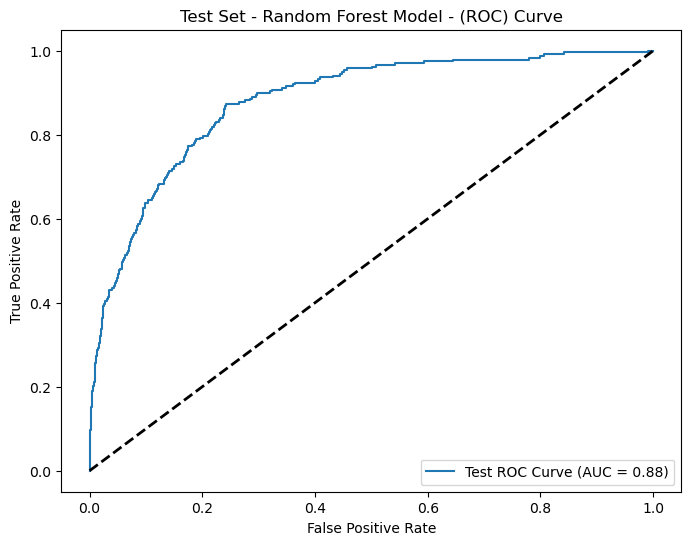

In [54]:
_X = X_train_resampled_encoded_scaled_S
_Y = y_train_resampled_S
model = model_for_rf

train_results_rf = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(train_results_rf["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('Random Forest Model - Confusion Matrix (Train)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_train_rf, fpr_train_rf, tpr_train_rf = draw_roc(model, _X, _Y, 'Train', 'Random Forest Model')

_X = X_test_scaled
_Y = y_test_S

test_results_rf = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(test_results_rf["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('Random Forest Model - Confusion Matrix (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_test_rf, fpr_test_rf, tpr_test_rf = draw_roc(model, _X, _Y, 'Test', 'Random Forest Model')

In [55]:
# Initializing the Gradient Boosting model with initial parameters
xgb = GradientBoostingClassifier()

# Creating a pipeline that first applies the column transformations and then runs the Gradient Boosting model
model_for_xgb = Pipeline([
    ('xg_boost', xgb)
])

# Fitting the model on the training data
model_for_xgb.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

Pipeline(steps=[('xg_boost', GradientBoostingClassifier())])

In [56]:
### Hyperparameter tuning using GridSearchCV

param_dist_xgb = {
    "xg_boost__n_estimators" : [150], # [50, 100, 150, 200],
    "xg_boost__max_depth" : [3], # [3, 5, 7, 9],
    "xg_boost__min_samples_leaf" : [3], # [3, 5, 7, 10],
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search_xgb = GridSearchCV(
    model_for_xgb, param_grid=param_dist_xgb, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search_xgb.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

# Extract results into a DataFrame
results_xgb = pd.DataFrame(random_search_xgb.cv_results_)

# Display the set of parameters that achieved the best score
results_xgb[results_xgb['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search for RF
print(random_search_xgb.best_params_)

# Update the model's hyperparameters to the best found during Grid Search
best_config = random_search_xgb.best_params_
model_for_xgb = model_for_xgb.set_params(
    xg_boost__n_estimators=best_config["xg_boost__n_estimators"],
    xg_boost__max_depth=best_config["xg_boost__max_depth"],
    xg_boost__min_samples_leaf=best_config["xg_boost__min_samples_leaf"],
)

# Refit the model using the training data
model_for_xgb = model_for_xgb.fit(X_train_resampled_encoded_scaled_S, y_train_resampled_S)

{'xg_boost__max_depth': 3, 'xg_boost__min_samples_leaf': 3, 'xg_boost__n_estimators': 150}


Model Evaluation Results
A. Confusion Matrix:
[[12200  2366]
 [ 1939 12627]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     14566
           1       0.84      0.87      0.85     14566

    accuracy                           0.85     29132
   macro avg       0.85      0.85      0.85     29132
weighted avg       0.85      0.85      0.85     29132

C. Accuracy: 0.85
D. Precision: 0.84
E. Recall (Sensitivity): 0.87
F. F1 Score: 0.85


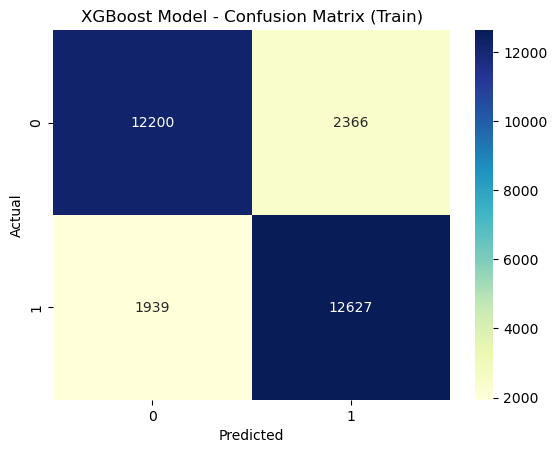

Train ROC-AUC: 0.9334


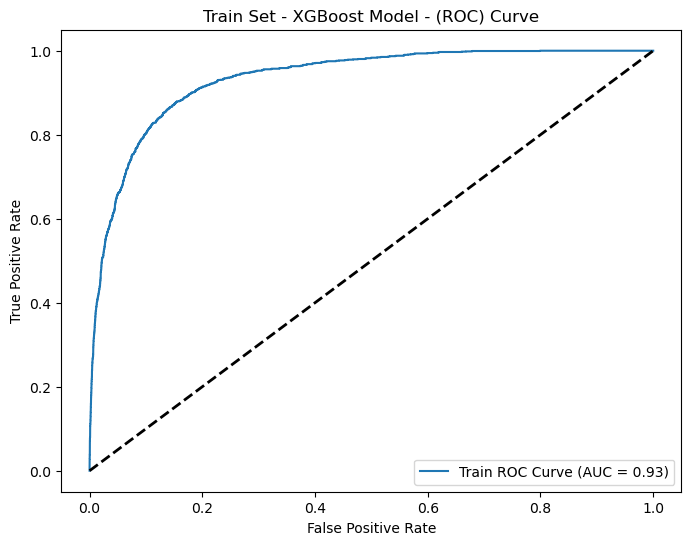

Model Evaluation Results
A. Confusion Matrix:
[[3621   38]
 [ 180   57]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3659
           1       0.60      0.24      0.34       237

    accuracy                           0.94      3896
   macro avg       0.78      0.62      0.66      3896
weighted avg       0.93      0.94      0.93      3896

C. Accuracy: 0.94
D. Precision: 0.60
E. Recall (Sensitivity): 0.24
F. F1 Score: 0.34


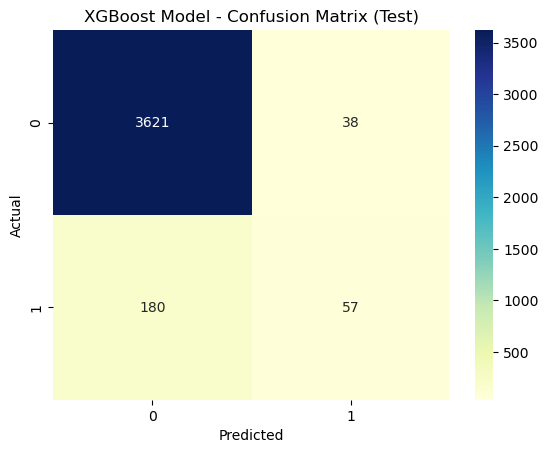

Test ROC-AUC: 0.8820


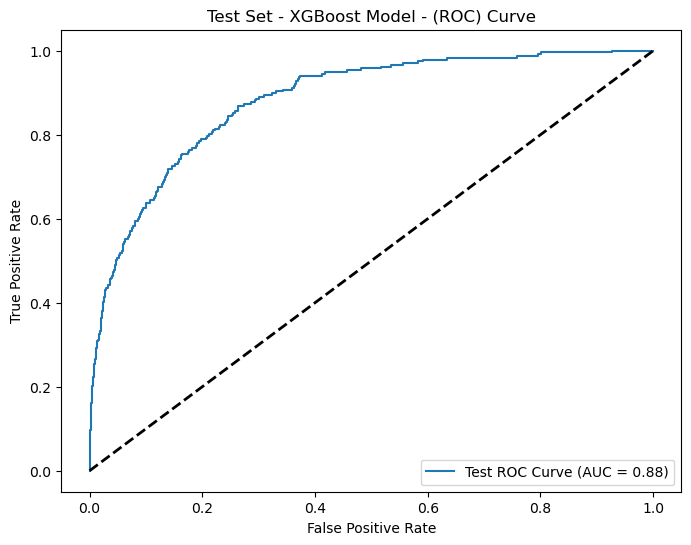

In [57]:
_X = X_train_resampled_encoded_scaled_S
_Y = y_train_resampled_S
model = model_for_xgb

train_results_xgb = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(train_results_xgb["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('XGBoost Model - Confusion Matrix (Train)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_train_xgb, fpr_train_xgb, tpr_train_xgb = draw_roc(model, _X, _Y, 'Train', 'XGBoost Model')

_X = X_test_scaled
_Y = y_test_S

test_results_xgb = evaluate_model_with_cross_val(
    model,
    _X,
    _Y,
)

sns.heatmap(test_results_xgb["confusion_matrix"], annot=True, fmt='d', cmap='YlGnBu')
plt.title('XGBoost Model - Confusion Matrix (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

roc_auc_test_xgb, fpr_test_xgb, tpr_test_xgb = draw_roc(model, _X, _Y, 'Test', 'XGBoost Model')

In [58]:
# setting evaluations
# TODO add external validation

evaluations = {
    'Model': [
        'LR Training',
        'LR Test',
        'KNN Training',
        'KNN Test',
        'SVM Training',
        'SVM Test',
        'DT Training',
        'DT Test',
        'RF Training',
        'RF Test',
        'XGB train',
        'XGB test',
    ],
    'Accuracy': [
        train_results_LR["accuracy"],
        test_results_LR["accuracy"],
        train_results_knn["accuracy"],
        test_results_knn["accuracy"],
        train_results_svm["accuracy"],
        test_results_svm["accuracy"],
        train_results_dt["accuracy"],
        test_results_dt["accuracy"],
        train_results_rf["accuracy"],
        test_results_rf["accuracy"],
        train_results_xgb["accuracy"],
        test_results_xgb["accuracy"],
    ],
    'Precision': [
        train_results_LR["precision"],
        test_results_LR["precision"],
        train_results_knn["precision"],
        test_results_knn["precision"],
        train_results_svm["precision"],
        test_results_svm["precision"],
        train_results_dt["precision"],
        test_results_dt["precision"],
        train_results_rf["precision"],
        test_results_rf["precision"],
        train_results_xgb["precision"],
        test_results_xgb["precision"],
    ],
    'Recall (Sensitivity)': [
        train_results_LR["recall"],
        test_results_LR["recall"],
        train_results_knn["recall"],
        test_results_knn["recall"],
        train_results_svm["recall"],
        test_results_svm["recall"],
        train_results_dt["recall"],
        test_results_dt["recall"],
        train_results_rf["recall"],
        test_results_rf["recall"],
        train_results_xgb["recall"],
        test_results_xgb["recall"],
    ],
    'F1 Score': [
        train_results_LR["f1_score"],
        test_results_LR["f1_score"],
        train_results_knn["f1_score"],
        test_results_knn["f1_score"],
        train_results_svm["f1_score"],
        test_results_svm["f1_score"],
        train_results_dt["f1_score"],
        test_results_dt["f1_score"],
        train_results_rf["f1_score"],
        test_results_rf["f1_score"],
        train_results_xgb["f1_score"],
        test_results_xgb["f1_score"],
    ]
}

# Creating a DataFrame
results_summary = pd.DataFrame(evaluations)
results_summary.head(n=len(results_summary))

,Model,Accuracy,Precision,Recall (Sensitivity),F1 Score
0,LR Training,0.764863,0.765082,0.764451,0.764766
1,LR Test,0.939938,0.528302,0.118143,0.193103
2,KNN Training,0.887958,0.819338,0.995400,0.898828
3,KNN Test,0.938655,0.437500,0.029536,0.055336
4,SVM Training,0.974289,0.952512,0.998352,0.974894
5,SVM Test,0.928388,0.285714,0.118143,0.167164
6,DT Training,0.784464,0.773661,0.804202,0.788636
7,DT Test,0.939425,0.513514,0.080169,0.138686
8,RF Training,0.920465,0.902689,0.942537,0.922183
9,RF Test,0.940195,0.666667,0.033755,0.064257


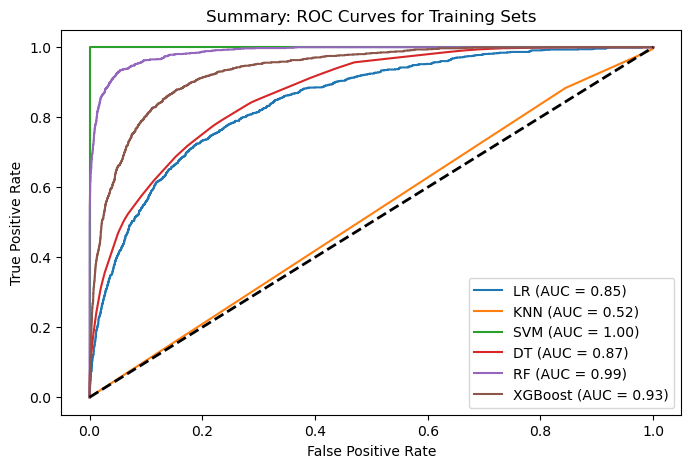

In [59]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Training Sets')
plt.plot(fpr_train_LR, tpr_train_LR, label=f'LR (AUC = {roc_auc_train_LR:.2f})')
plt.plot(fpr_train_knn, tpr_train_knn, label=f'KNN (AUC = {roc_auc_train_knn:.2f})')
plt.plot(fpr_train_svm, tpr_train_svm, label=f'SVM (AUC = {roc_auc_train_svm:.2f})')
plt.plot(fpr_train_dt, tpr_train_dt, label=f'DT (AUC = {roc_auc_train_dt:.2f})')
plt.plot(fpr_train_rf, tpr_train_rf, label=f'RF (AUC = {roc_auc_train_rf:.2f})')
plt.plot(fpr_train_xgb, tpr_train_xgb, label=f'XGBoost (AUC = {roc_auc_train_xgb:.2f})')
# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()


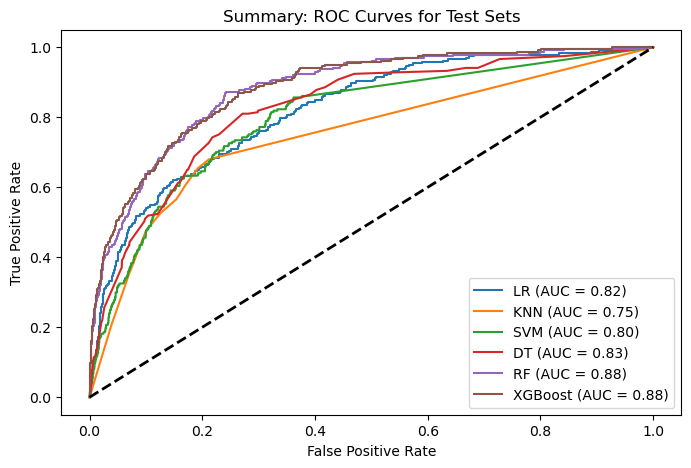

In [60]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Test Sets')
plt.plot(fpr_test_LR, tpr_test_LR, label=f'LR (AUC = {roc_auc_test_LR:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, label=f'KNN (AUC = {roc_auc_test_knn:.2f})')
plt.plot(fpr_test_svm, tpr_test_svm, label=f'SVM (AUC = {roc_auc_test_svm:.2f})')
plt.plot(fpr_test_dt, tpr_test_dt, label=f'DT (AUC = {roc_auc_test_dt:.2f})')
plt.plot(fpr_test_rf, tpr_test_rf, label=f'RF (AUC = {roc_auc_test_rf:.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGBoost (AUC = {roc_auc_test_xgb:.2f})')
# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()
